# Bienvenida

Mi nombre es Francisco Delgado Ayala. He realizado el siguiente Notebook de Jupyter utilizando Python 3, y las librerías incluidas en Anaconda, procurando facilitar la lectura y comprensión del código a través de comentarios explicativos en cada paso.

Espero que el uso de Python facilite la enseñanza de la estadística, la metodología de la investigación y la ciencia de datos en áreas donde será de gran utilidad, tanto para el crecimiento del conocimiento como para el desarrollo de los médicos en formación. Es importante recalcar que algunos términos utilizados en este archivo son empleados por "convención" en cuanto al código, y otros para facilitar la descripción.

## Definiciones

- **Marco de datos** (Dataframe): En el contexto de programación y ciencia de datos, un Dataframe es una estructura bidimensional de datos, similar a una tabla de base de datos, una hoja de cálculo de Excel o una tabla de datos en estadísticas. Está organizado en columnas que pueden contener datos de diferentes tipos (como números, cadenas, entre otros) y permite realizar operaciones como filtrado, agrupación y agregación de datos. Las librerías de Python, como pandas, ofrecen herramientas para manipular Dataframes de manera efectiva.
- **Librería**: En programación, es una colección de funciones y procedimientos que facilita realizar tareas específicas sin redactar código desde cero. (Nota: Aunque en algunos contextos hispanohablantes "librería" se relaciona con libros, en programación se emplea para describir esta colección de herramientas).

## Pruebas estadísticas

Estos términos son ampliamente usados en estadística y en la evaluación de modelos de clasificación. A continuación, te describiré cómo se calcula cada uno, basándome en una matriz de confusión que tiene cuatro componentes: Verdaderos Positivos (VP, o TP en inglés por "True Positives"), Verdaderos Negativos (VN, o TN en inglés por "True Negatives"), Falsos Positivos (FP), y Falsos Negativos (FN).

1. **Exactitud (Accuracy)**: 
    - `(VP+VN) / (VP+VN+FP+FN)`

2. **Precisión o Valor Predictivo Positivo (VPP)**:
    - `(VP) / (VP+FP)`

3. **Sensibilidad (Recall)**:
    - `(VP) / (VP+FN)`
    - Es la proporción de positivos reales que fueron identificados correctamente.

4. **F1-Score**:
    - `2 * (Precisión * Sensibilidad) / (Precisión + Sensibilidad)`
    - Es la media armónica entre precisión y sensibilidad.

5. **Especificidad**:
    - `(VN) / (VN + FP)`
    - Es la proporción de negativos reales que fueron identificados correctamente.

6. **Valor Predictivo Negativo (VPN)**:
    - `(VN) / (VN + FN)`

Estos cálculos asumen que tienes acceso a la matriz de confusión de tu modelo o método de clasificación. La matriz de confusión es una herramienta esencial para evaluar la calidad de un clasificador, especialmente en contextos donde las clases no están equilibradas.


## 1.-Importando las librerías y archivos necesarios y realizando los ajustes iniciales
### 1.1.-Realizaremos un análisis inicial de los tipos de datos y llevaremos a cabo un análisis exploratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, kstest, anderson, zscore
import openpyxl as op
import sklearn
#import ydata_profiling as ydp

In [2]:
np.random.seed(1)

# Generamos y ordenamos el arreglo aleatorio
arreglo_aleatorio = np.sort(np.random.randint(1, 150, size=3))
print('Semilla de arreglo aleatorio: ', arreglo_aleatorio)

Semilla de arreglo aleatorio:  [ 38  73 141]


In [3]:
archivo = 'datos.xlsx'

df = pd.read_excel(archivo, sheet_name = 'p1')
df.sort_index(inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   e       641 non-null    int64  
 1   s       641 non-null    int64  
 2   u       636 non-null    float64
 3   p       641 non-null    float64
 4   t       641 non-null    float64
 5   ts      637 non-null    float64
 6   td      637 non-null    float64
 7   gs      641 non-null    int64  
 8   c       641 non-null    int64  
 9   hdl     641 non-null    int64  
 10  cc      552 non-null    float64
 11  pp      115 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 60.2 KB


In [5]:
df.isnull().sum()

e        0
s        0
u        5
p        0
t        0
ts       4
td       4
gs       0
c        0
hdl      0
cc      89
pp     526
dtype: int64

## 2.-Limpieza de datos
Transformación de tipo de datos

In [59]:
# Convertir cm a m
df['cc'] = df['cc'] / 100

# Agregaremos las columnas de imc, cct, cnhdl, chdl
df['imc'] = (df['p'] / (df['t'] ** 2))
df['cct'] = df['cc'] / df['t']
df['cnhdl'] = df['c'] - df['hdl']
df['chdl'] = df['c'] / df['hdl']

df.head()

,e,s,u,p,t,ts,td,gs,c,hdl,cc,pp,imc,cct,cnhdl,chdl
0,18,1,1.0,62.0,1.55,101.0,70.0,85,188,53,0.81,NaN,25.806452,0.522581,135,3.547170
1,18,2,1.0,70.0,1.67,93.0,63.0,86,155,54,0.90,NaN,25.099502,0.538922,101,2.870370
2,19,1,1.0,56.0,1.58,109.0,73.0,93,143,60,0.67,33.6,22.432303,0.424051,83,2.383333
3,19,1,1.0,52.2,1.59,108.0,75.0,93,143,60,0.67,33.6,20.647917,0.421384,83,2.383333
4,19,1,1.0,53.0,1.54,118.0,72.0,83,146,52,0.73,NaN,22.347782,0.474026,94,2.807692


In [60]:
df.dtypes

e          int64
s          int64
u        float64
p        float64
t        float64
ts       float64
td       float64
gs         int64
c          int64
hdl        int64
cc       float64
pp       float64
imc      float64
cct      float64
cnhdl      int64
chdl     float64
dtype: object

In [61]:
df_categorico = df.copy()
df_numerico = df.copy()

# Convertimos las variables categoricas
df_categorico['s'] = df_categorico['s'].map({1: '1', 2: '2'})
df_categorico['u'] = df_categorico['u'].map({1: '1', 2: '2', 3: '3', 4: '4'})

df_categorico['s'] = df_categorico['s'].astype('category')
df_categorico['u'] = df_categorico['u'].astype('category')

In [62]:
# Estandarizaremos los datos y convertiremos las variables correspondientes a tipo categórica y 
# numérica para facilitar el análisis estadístico

# 1. Creamos una función para estandarizar y desestandarizar todas las columnas necesarias
# 1.1. Funciones
def estandarizar_todas_columnas(df, todas_columnas_a_estandarizar, todas_medias_columnas, todas_desviaciones_columnas):
    for columna in todas_columnas_a_estandarizar:
        df[columna] = (df[columna] - todas_medias_columnas[columna]) / todas_desviaciones_columnas[columna]
    return df

def desestandarizar_todas_columnas(df, todas_columnas_a_estandarizar, todas_medias_columnas, todas_desviaciones_columnas):
    for columna in todas_columnas_a_estandarizar:
        df[columna] = (df[columna] * todas_desviaciones_columnas[columna]) + todas_medias_columnas[columna]
    return df

# 1.2. Definimos las columnas de las "estandarizar_todas_columnas" y "desestandarizar_todas_columnas"
todas_columnas_a_estandarizar = ['e', 's', 'u', 'p',
                                  't', 'ts', 'td', 'gs',
                                  'c', 'hdl', 'cc', 'pp',
                                  'imc', 'cct', 'cnhdl', 'chdl']

# 2. Creamos una función para estandarizar y desestandarizar las columnas necesarias
# 2.1. Funciones
def estandarizar_columnas(df, columnas_a_estandarizar, medias_columnas, desviaciones_columnas):
    for columna in columnas_a_estandarizar:
        df[columna] = (df[columna] - medias_columnas[columna]) / desviaciones_columnas[columna]
    return df

def desestandarizar_columnas(df, columnas_a_estandarizar, medias_columnas, desviaciones_columnas):
    for columna in columnas_a_estandarizar:
        df[columna] = (df[columna] * desviaciones_columnas[columna]) + medias_columnas[columna]
    return df

# 2.2. Definimos las columnas de las "estandarizar_columnas" y "desestandarizar_columnas"
columnas_a_estandarizar = ['e', 'p', 't', 'ts', 'td',
                           'gs', 'c', 'hdl', 'cc', 'pp',
                           'imc', 'cct', 'cnhdl', 'chdl']

# 3. Definimos una función para exportar los datos imputados a un archivo excel
def exportar_imputados_a_excel (df, sheet_name):
    filepath = 'datos.xlsx'
    with pd.ExcelWriter(filepath, mode = 'a', if_sheet_exists = 'replace') as writer:
        df.to_excel(writer, sheet_name = sheet_name, index = False)

In [63]:
# Estandarizaremos df_categorico y df_numerico

# Primero copiamos los dataframes
df_ce = df_categorico.copy()
# df_ce = DataFrame Categorico Estandarizado
df_ne = df_numerico.copy()
# df_ne = DataFrame Numerico Estandarizado

# Segundo definimos "medias_columnas" y "desviaciones_columnas"
medias_columnas = df_ce[columnas_a_estandarizar].mean()
desviaciones_columnas = df_ce[columnas_a_estandarizar].std()

# Tercero definimos "todas_medias_columnas" y "todas_desviaciones_columnas"
todas_medias_columnas = df_ne[todas_columnas_a_estandarizar].mean()
todas_desviaciones_columnas = df_ne[todas_columnas_a_estandarizar].std()

# Cuarto estandarizamos los dataframes

# Estandarizar df_ce
df_ce = estandarizar_columnas(
    df_ce,
    columnas_a_estandarizar,
    medias_columnas,
    desviaciones_columnas
)

# Estandarizar df_ne
df_ne = estandarizar_todas_columnas(
    df_ne,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

In [64]:
df_ce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   e       641 non-null    float64 
 1   s       641 non-null    category
 2   u       636 non-null    category
 3   p       641 non-null    float64 
 4   t       641 non-null    float64 
 5   ts      637 non-null    float64 
 6   td      637 non-null    float64 
 7   gs      641 non-null    float64 
 8   c       641 non-null    float64 
 9   hdl     641 non-null    float64 
 10  cc      552 non-null    float64 
 11  pp      115 non-null    float64 
 12  imc     641 non-null    float64 
 13  cct     552 non-null    float64 
 14  cnhdl   641 non-null    float64 
 15  chdl    641 non-null    float64 
dtypes: category(2), float64(14)
memory usage: 71.8 KB


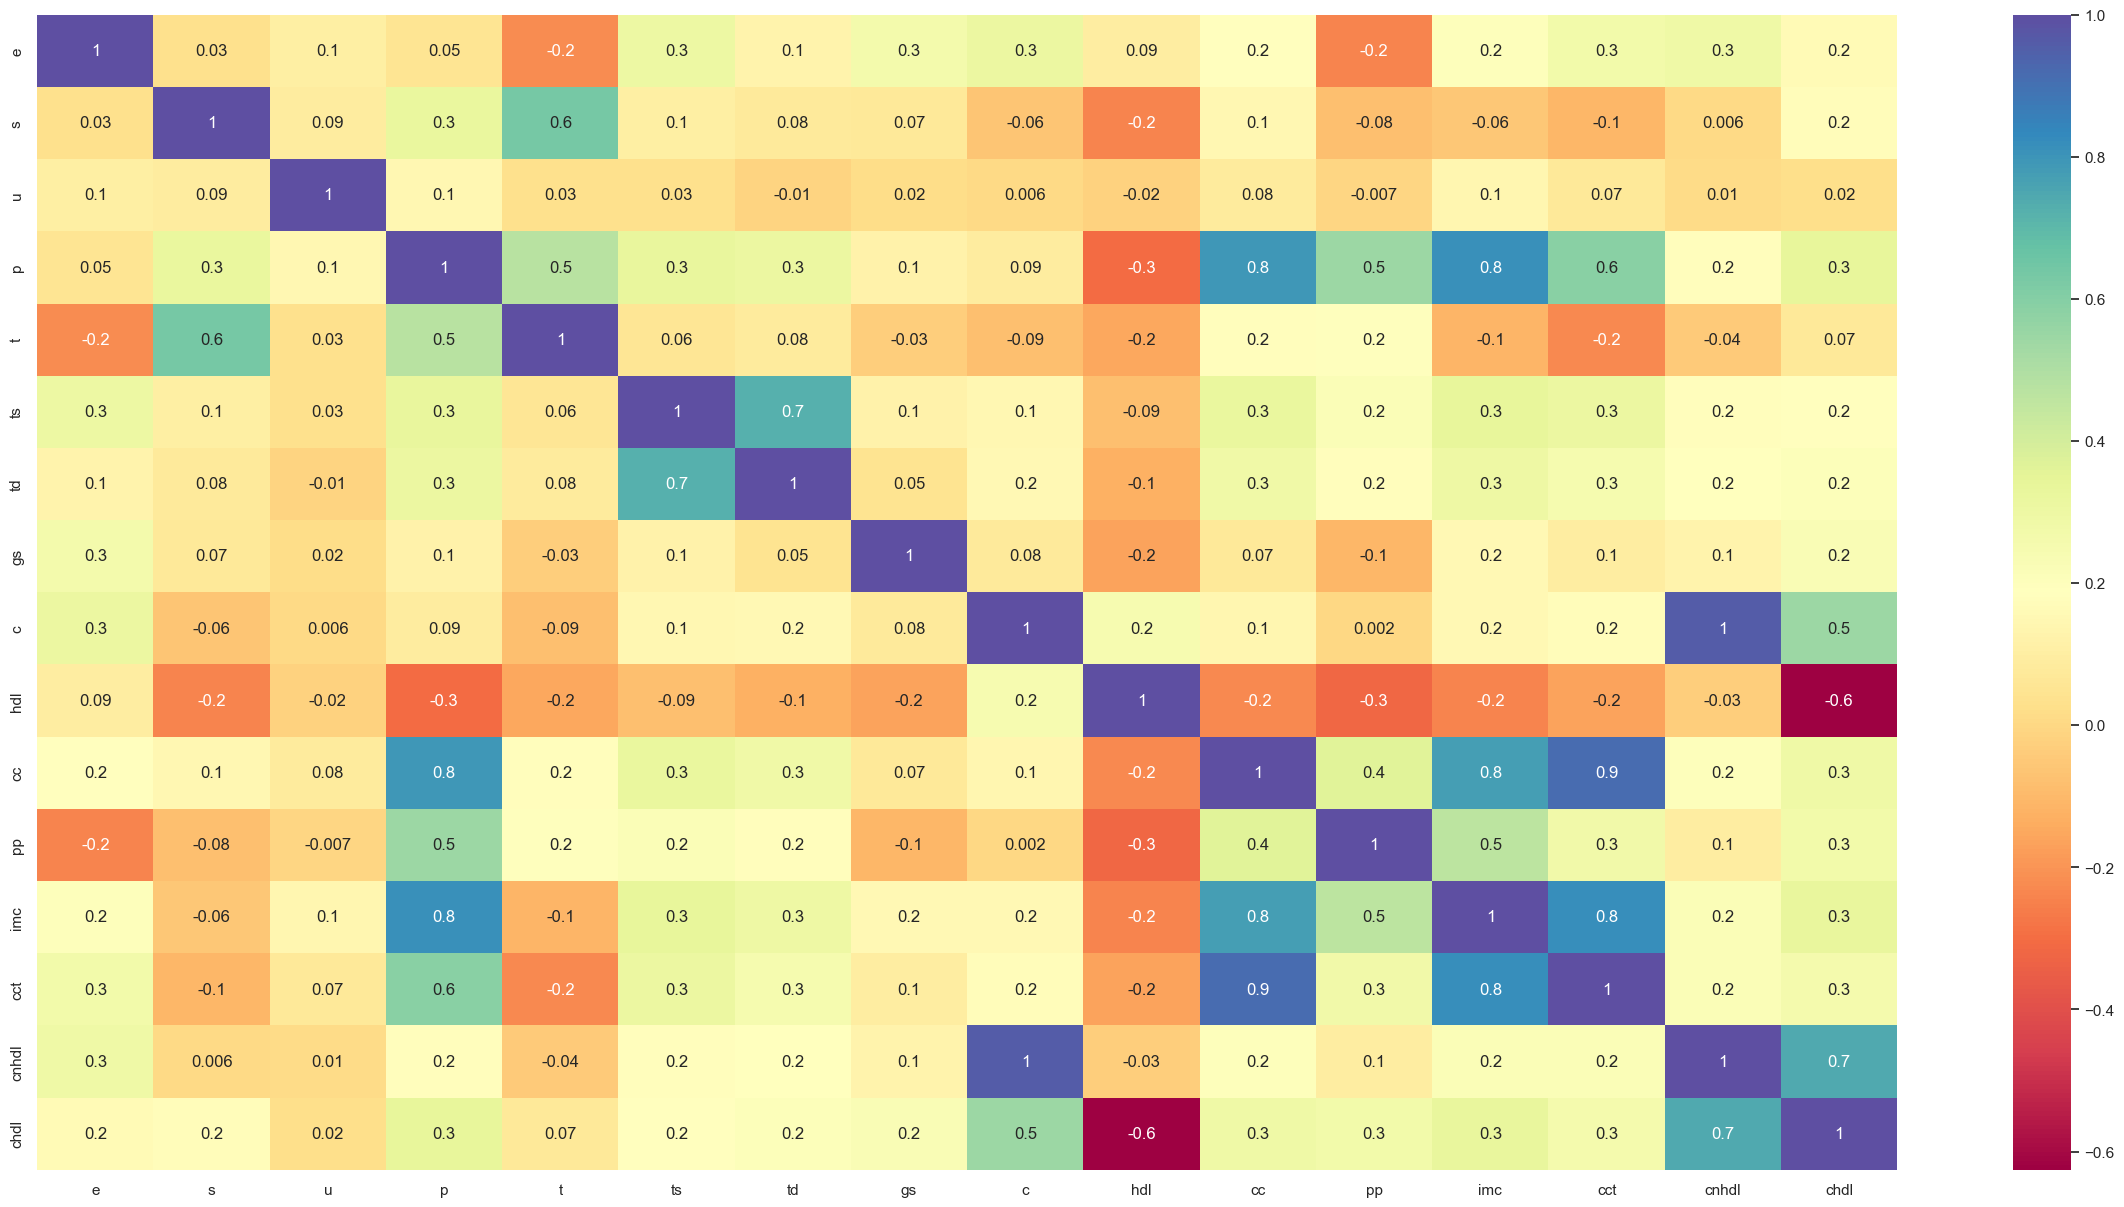

In [65]:
corrMatrix = df_ne.corr()
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corrMatrix, annot=True, fmt='.1g', ax=ax, cmap='Spectral');

# Métodos de predicción

In [66]:
# Librerías generales de Python
from itertools import cycle

# Librerías para clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, RocCurveDisplay

# Librerías para regresión
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Librerías para preprocesamiento
from sklearn.preprocessing import LabelBinarizer

# Librerías para evaluación y visualización
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score

### Métodos de Clasificación

#### Variable 'u' (turno)

In [67]:
# Segmentamos los datos

# Separamos la variable objetivo, las variables incluidas
# y excluidas del modelo

columnas_seleccionadas = ['e', 's', 'u', 'p', 
                     't', 'ts', 'td', 'gs', 
                     'c', 'hdl', 'cc', 'pp', 
                     'imc', 'cct', 'cnhdl', 'chdl']
datos_completos = df_ce.copy()
datos = df_ce[columnas_seleccionadas]
datos.sort_index(inplace = True)
variable_objetivo = 'u'
variables_predictoras = [columna for columna in datos.columns if 
                         columna != variable_objetivo and columna not in 
                         ['ts', 'td', 'cc', 'pp', 'cct']]

# Separamos los datos en predictoras y objetivo
datos_con_valores_perdidos = datos[datos[variable_objetivo].isnull()].copy()
datos_sin_valores_perdidos = datos.dropna()
X = datos_sin_valores_perdidos[variables_predictoras]
y = datos_sin_valores_perdidos[variable_objetivo]

X_perdidos = datos_con_valores_perdidos[variables_predictoras]

##### Arból de decisión

Estructura de la matriz: (23, 4)

Categorías: ['1' '2' '3' '4']
Clase Matutino: [[1 0 0 0]]
Clase Vespertino: [[0 1 0 0]]
Clase Nocturno: [[0 0 1 0]]
Clase Mixto: [[0 0 0 1]]

y_puntaje:
[[1.         0.         0.         0.        ]
 [0.79245283 0.0754717  0.05660377 0.0754717 ]]

y_puntaje.ravel():
[1.         0.         0.         0.         0.79245283 0.0754717
 0.05660377 0.0754717 ]

Profundidad óptima del árbol de decisión: 4
Arreglo aleatorio óptimo: 38
Exactitud media del modelo de árbol de decisión: 0.61
Desviación estándar de la exactitud del modelo de árbol de decisión: 0.0
Exactitud de arbolu: 0.61
Precisión de arbolu: 0.64
Sensibilidad de arbolu: 0.61
F1-score de arbolu: 0.5
ROC/AUC de arbolu: 0.76

Matriz de confusión:
 [[13  0  0  0]
 [ 2  0  0  0]
 [ 1  0  0  0]
 [ 6  0  0  1]]


/Users/franciscodelgadoayala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


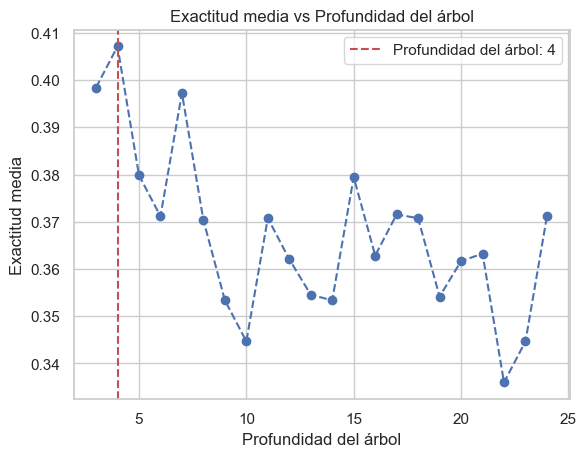

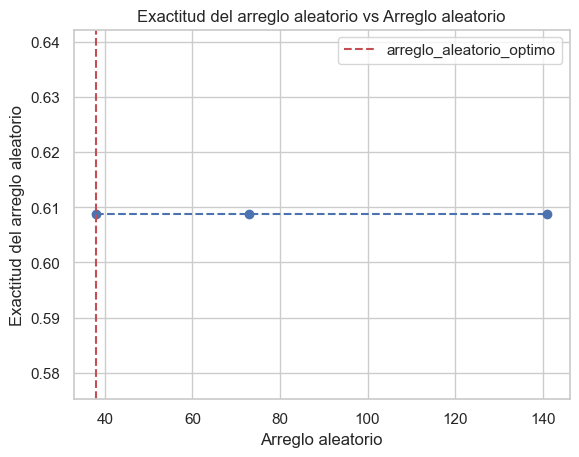

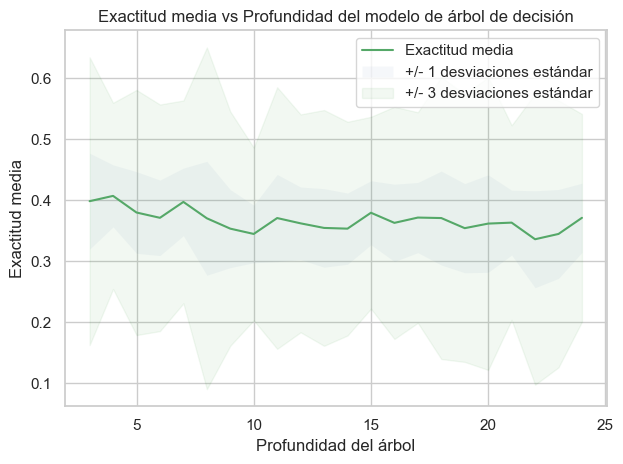

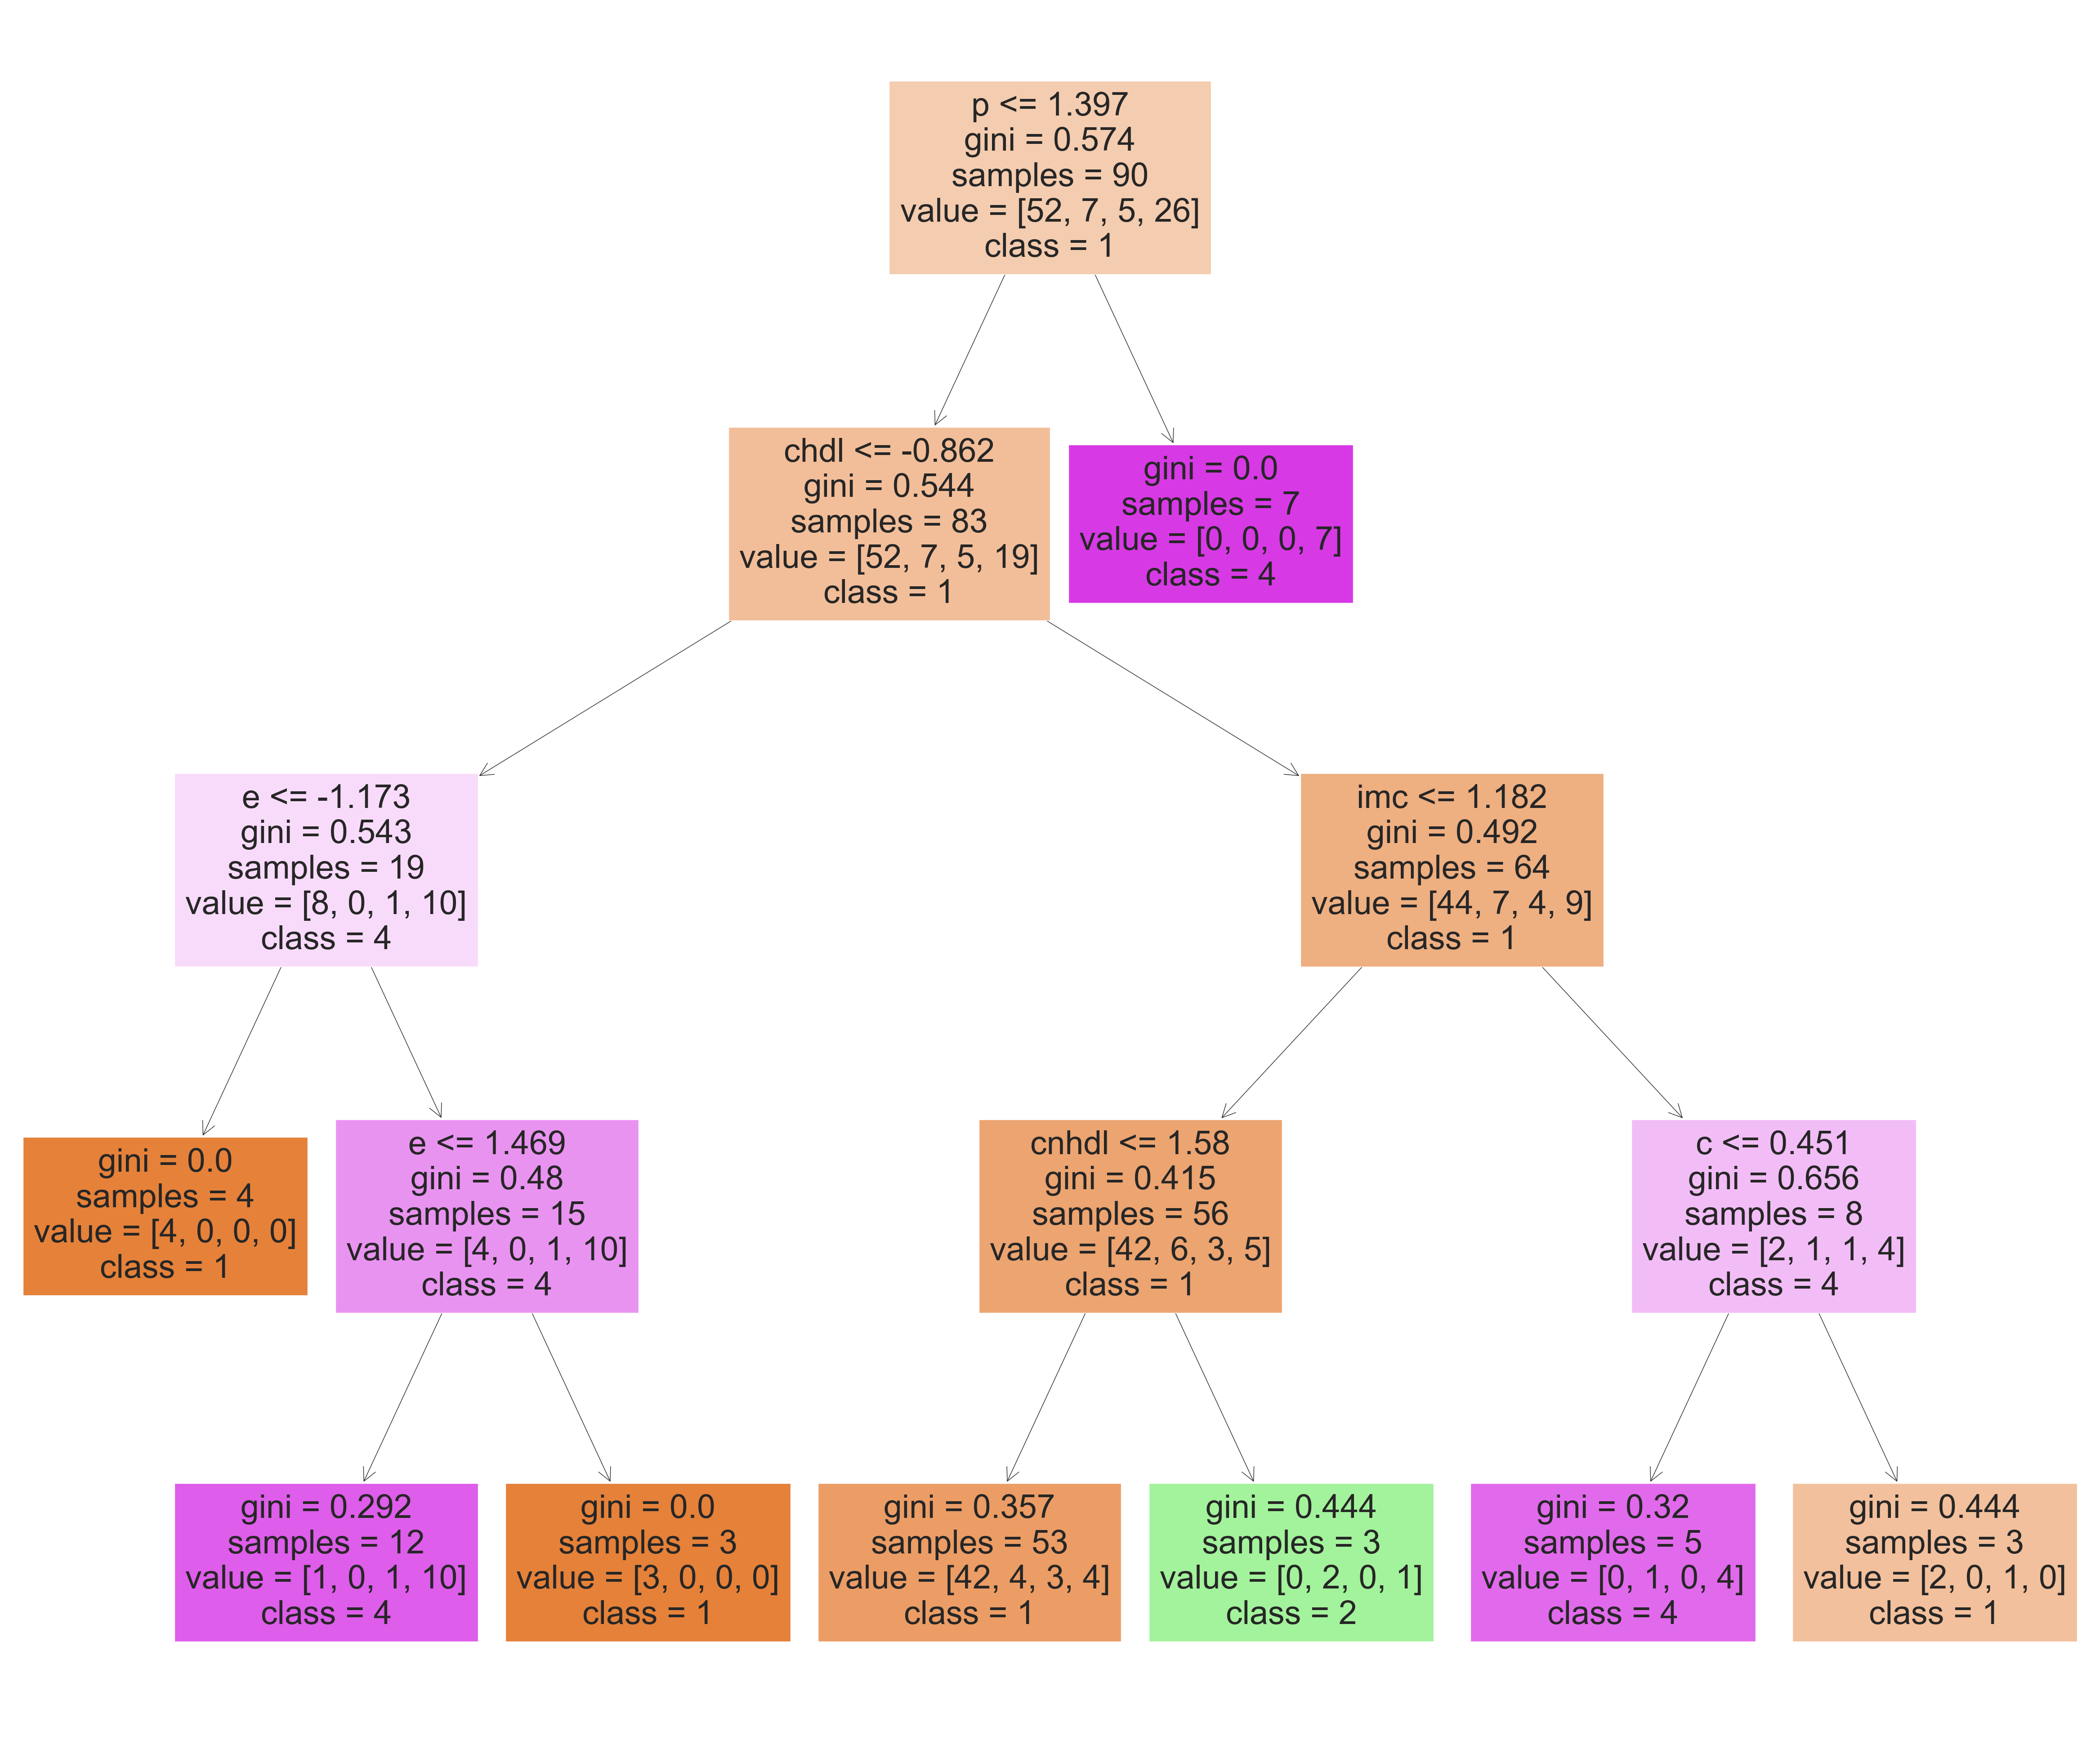

ROC/AUC del Modelo:
0.76


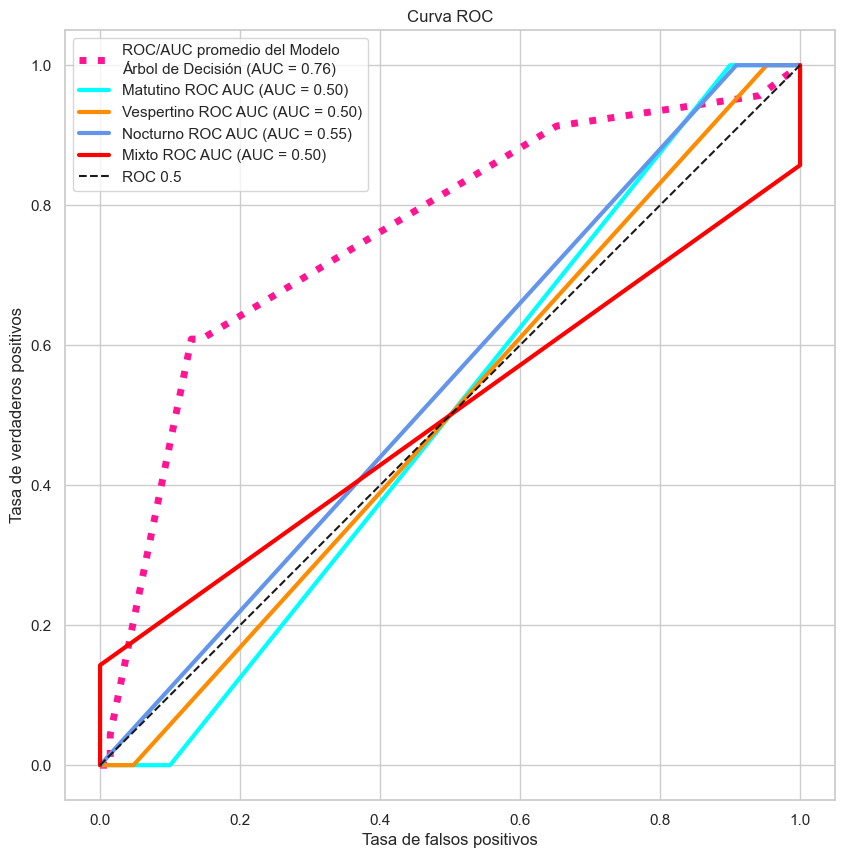

In [68]:
# Evaluamos diferentes profundidades del árbol de decisión
depths = list(range(3, 25))
media_exactitud_profundidad = []
desviacion_estandar_exactitud_arbol = []

for depth in depths:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size = 0.2, stratify = y)
    arbolu = DecisionTreeClassifier(max_depth = depth)
    arbolu.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = arbolu.predict(X_prueba)
    score = cross_val_score(arbolu,X, y, cv = 5, scoring='accuracy')
    media_exactitud_profundidad.append(score.mean())
    desviacion_estandar_exactitud_arbol.append(score.std())

profundidad_optima = depths[np.argmax(media_exactitud_profundidad)]

# Evaluamos el mejor arreglo aleatorio de los datos
exactitud_arreglo = []

for arreglo in arreglo_aleatorio:
       X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
              X, y, test_size = 0.2, 
              random_state = arreglo, stratify = y)
       arbolu = DecisionTreeClassifier(max_depth = profundidad_optima)
       arbolu.fit(X_entrenamiento, y_entrenamiento)
       score = cross_val_score(arbolu, X, y, cv = 5, scoring = 'accuracy')
       y_prediccion = arbolu.predict(X_prueba)
       exactitud = accuracy_score(y_prueba, y_prediccion)
       exactitud_arreglo.append(exactitud)

media_exactitud_arbolu = np.mean(exactitud_arreglo)
desviacion_estandar_arbolu = np.std(exactitud_arreglo)
arreglo_aleatorio_optimo_arbolu = arreglo_aleatorio[np.argmax(exactitud_arreglo)]

# Usamos la profundidad óptima y el arreglo aleatorio óptimo
# para entrenar el modelo 'arbolu'
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size = 0.2, 
       random_state =  arreglo_aleatorio_optimo_arbolu, stratify = y)
arbolu = DecisionTreeClassifier(max_depth = profundidad_optima)
arbolu.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = arbolu.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'arbolu'
# --------------------

y_puntaje_arbolu = arbolu.fit(
    X_entrenamiento, y_entrenamiento).predict_proba(X_prueba)

# Etiquetamos las categorías o clases
label_binarizer = LabelBinarizer().fit(y_entrenamiento)
y_onehot_prueba_arbolu = label_binarizer.transform(y_prueba)

# Revisión de codificación de clases
print('Estructura de la matriz:', y_onehot_prueba_arbolu.shape)
print('\nCategorías:', label_binarizer.classes_)
print('Clase Matutino:', label_binarizer.transform(["1"]))
print('Clase Vespertino:', label_binarizer.transform(["2"]))
print('Clase Nocturno:', label_binarizer.transform(["3"]))
print('Clase Mixto:', label_binarizer.transform(["4"]))


# Conversión de clases para graficar la curva ROC
clase_de_interes_1 = "1"
id_clase_1 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_1)[0]
clase_de_interes_2 = "2"
id_clase_2 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_2)[0]
clase_de_interes_3 = "3"
id_clase_3 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_3)[0]
clase_de_interes_4 = "4"
id_clase_4 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_4)[0]

print(f'\ny_puntaje:\n{y_puntaje_arbolu[0:2,:]}')
print()
print(f'y_puntaje.ravel():\n{y_puntaje_arbolu[0:2,:].ravel()}')

# Métricas de evaluación
exactitud_arbolu = accuracy_score(y_prueba, y_prediccion)
precision_arbolu = precision_score(y_prueba, y_prediccion, average="weighted")
sensibilidad_arbolu = recall_score(y_prueba, y_prediccion, average="weighted")
f1_arbolu = f1_score(y_prueba, y_prediccion, average="weighted")

micro_roc_auc_ovr_arbolu = roc_auc_score(y_prueba, y_puntaje_arbolu,
                                        multi_class='ovr', average='micro')

print("\nProfundidad óptima del árbol de decisión:", profundidad_optima)
print("Arreglo aleatorio óptimo:", arreglo_aleatorio_optimo_arbolu)
print("Exactitud media del modelo de árbol de decisión:", 
      round(media_exactitud_arbolu, 2))
print("Desviación estándar de la exactitud del modelo de árbol de decisión:", 
      round(desviacion_estandar_arbolu, 2))
matriz_confusion_arbolu = confusion_matrix(y_prueba, y_prediccion)



print("Exactitud de arbolu:", round(exactitud_arbolu, 2))
print("Precisión de arbolu:", round(precision_arbolu, 2))
print("Sensibilidad de arbolu:", round(sensibilidad_arbolu, 2))
print("F1-score de arbolu:", round(f1_arbolu, 2))
print("ROC/AUC de arbolu:", round(micro_roc_auc_ovr_arbolu, 2))

print("\nMatriz de confusión:\n", matriz_confusion_arbolu)



# --------------------
# Graficamos las métricas del modelo 'arbolu'
# --------------------

# Exactitud media vs Profundidad del árbol
plt.figure()
plt.plot(depths, media_exactitud_profundidad, 'o--')
plt.xlabel('Profundidad del árbol') 
plt.ylabel('Exactitud media')
plt.title('Exactitud media vs Profundidad del árbol')
plt.axvline(profundidad_optima, color='r', linestyle='--', 
            label=f'Profundidad del árbol: {profundidad_optima}')
plt.legend()
plt.show()

# Exactitud del arreglo aleatorio vs Arreglo aleatorio
plt.figure()
plt.plot(arreglo_aleatorio, exactitud_arreglo, 'o--')
plt.xlabel('Arreglo aleatorio')
plt.ylabel('Exactitud del arreglo aleatorio')
plt.title('Exactitud del arreglo aleatorio vs Arreglo aleatorio')
plt.axvline(arreglo_aleatorio_optimo_arbolu, color='r', linestyle='--', 
            label=f'arreglo_aleatorio_optimo')
plt.legend()
plt.show()

# Exactitud media vs Profundidad del árbol
plt.plot(depths, media_exactitud_profundidad, "g")
plt.fill_between(
    depths, np.array(media_exactitud_profundidad) - 1 * np.array(desviacion_estandar_exactitud_arbol),
    np.array(media_exactitud_profundidad) + 1 * np.array(desviacion_estandar_exactitud_arbol), alpha = 0.05)
plt.fill_between(
    depths, np.array(media_exactitud_profundidad) - 3 * np.array(desviacion_estandar_exactitud_arbol),
    np.array(media_exactitud_profundidad) + 3 * np.array(desviacion_estandar_exactitud_arbol), alpha = 0.05, color="green")
plt.legend(("Exactitud media", "+/- 1 desviaciones estándar", "+/- 3 desviaciones estándar"))
plt.ylabel("Exactitud media")
plt.xlabel("Profundidad del árbol")
plt.title("Exactitud media vs Profundidad del modelo de árbol de decisión")
plt.tight_layout()
plt.show()

# Gráfica del modelo de árbol de decisión
plt.figure(figsize=(60,50))
class_names = [str(cls) for cls in arbolu.classes_]
plot_tree(arbolu, feature_names = variables_predictoras, class_names = class_names,
          filled = True)
plt.show()




#--------------------
# Curvas ROC

# Almacenamos los fpr, tpr, roc_auc para todos los promedios
fpr_arbolu, tpr_arbolu, roc_auc_arbolu = dict(), dict(), dict()

# Calculamos la curva ROC y el área ROC de los promedios de tipo 'micro'
fpr_arbolu['micro'], tpr_arbolu['micro'], _ = roc_curve(
    y_onehot_prueba_arbolu.ravel(), y_puntaje_arbolu.ravel())
roc_auc_arbolu['micro'] = auc(fpr_arbolu['micro'], tpr_arbolu['micro'])
print(f"ROC/AUC del Modelo:\n{roc_auc_arbolu['micro']:.2f}")

# Gráficamos
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr_arbolu['micro'],
    tpr_arbolu['micro'],
    label=f"ROC/AUC promedio del Modelo \nÁrbol de Decisión (AUC = {roc_auc_arbolu['micro']:.2f})",
    color='deeppink',
    linestyle=':',
    linewidth=5,
)

# Mapeo entre los índices de clases y sus nombres
clase_nombres = {
    0: 'Matutino',
    1: 'Vespertino',
    2: 'Nocturno',
    3: 'Mixto'
}

for id_clase, color in zip([id_clase_1, id_clase_2, id_clase_3, id_clase_4],
                          ['aqua', 'darkorange', 'cornflowerblue', 'red']):
    RocCurveDisplay.from_predictions(
        y_onehot_prueba_arbolu[:, id_clase],
        y_puntaje_arbolu[:, id_clase],
        name=f"{clase_nombres[id_clase]} ROC AUC", 
        color=color,
        linewidth=3,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], 'k--', label='ROC 0.5')
plt.axis('square')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


##### Bosque aleatorio

Estructura de la matriz: (23, 4)

Categorías: ['1' '2' '3' '4']
Clase Matutino: [[1 0 0 0]]
Clase Vespertino: [[0 1 0 0]]
Clase Nocturno: [[0 0 1 0]]
Clase Mixto: [[0 0 0 1]]

Estimador óptimo del bosque aleatorio: 110
Arreglo aleatorio óptimo: 73
Exactitud media del modelo de bosque aleatorio: 0.64
Desviación estándar de la exactitud del modelo de bosque aleatorio: 0.04
Exactitud de bosque: 0.74
Precisión de bosqueu: 0.64
Sensibilidad de bosqueu: 0.74
F1-score de bosqueu: 0.69
ROC/AUC de bosqueu: 0.9

Matriz de confusión
: [[12  0  0  1]
 [ 1  0  0  1]
 [ 1  0  0  0]
 [ 2  0  0  5]]


/Users/franciscodelgadoayala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


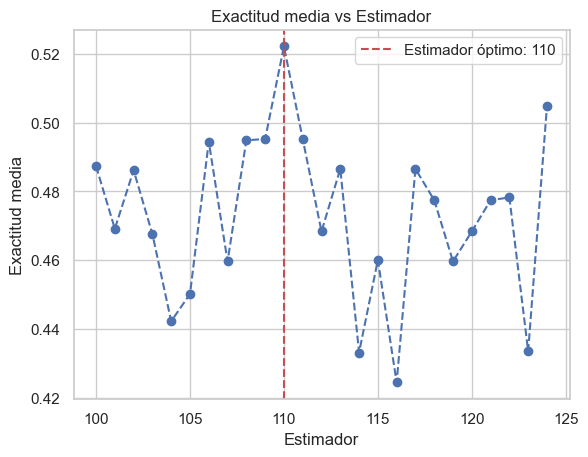

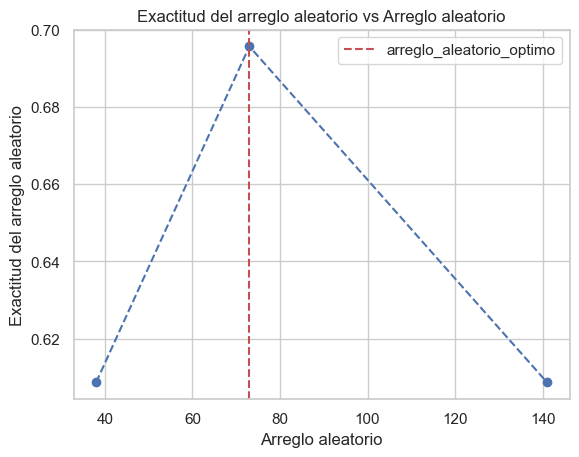

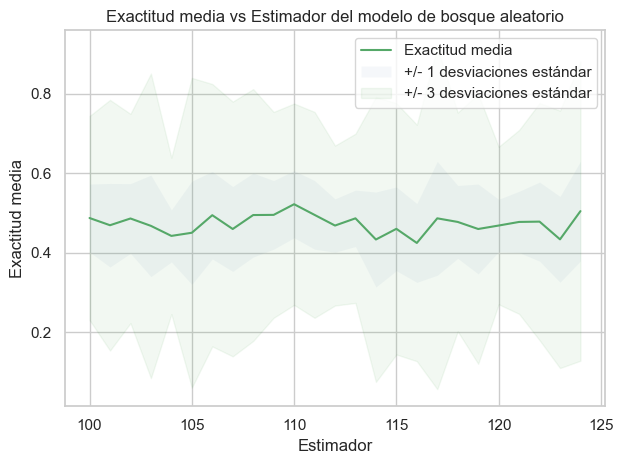

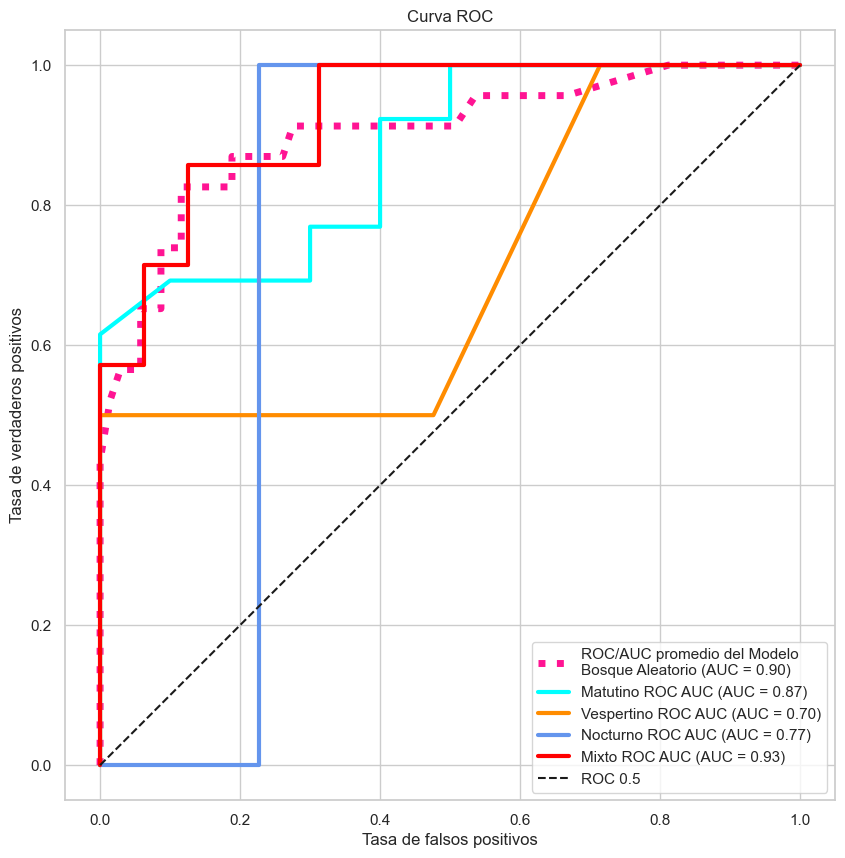

In [69]:
# Evaluamos diferentes valores de estimadores
estimadores = list(range(100, 125))
media_exactitud_estimadores = []
desviacion_estandar_exactitud_estimadores = []

for estimator in estimadores:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size = 0.2, stratify = y)
    bosqueu = RandomForestClassifier(n_estimators = estimator)
    bosqueu.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = bosqueu.predict(X_prueba)
    score = cross_val_score(bosqueu,X, y, cv = 5, scoring = 'accuracy')
    media_exactitud_estimadores.append(score.mean())
    desviacion_estandar_exactitud_estimadores.append(score.std())

estimador_optimo_u = estimadores[np.argmax(media_exactitud_estimadores)]

# Evaluamos el mejor arreglo aleatorio de los datos
exactitud_arreglo = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2, random_state=arreglo, stratify = y)
    bosqueu = RandomForestClassifier(n_estimators = estimador_optimo_u)
    bosqueu.fit(X_entrenamiento, y_entrenamiento)
    score = cross_val_score(bosqueu, X, y, cv = 5, scoring = 'accuracy')
    y_prediccion = bosqueu.predict(X_prueba)
    exactitud = accuracy_score(y_prueba, y_prediccion)
    exactitud_arreglo.append(exactitud)

media_exactitud_bosqueu = np.mean(exactitud_arreglo)
desviacion_estandar_bosqueu = np.std(exactitud_arreglo)
arreglo_aleatorio_optimo_bosqueu = arreglo_aleatorio[np.argmax(exactitud_arreglo)]

# Usamos el estimador óptimo y el arreglo aleatorio óptimo para entrenar el modelo 'bosqueu'
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2, random_state = arreglo_aleatorio_optimo_bosqueu, stratify = y)
bosqueu = RandomForestClassifier(n_estimators = estimador_optimo_u)
bosqueu.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = bosqueu.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'bosqueu'
# --------------------

y_puntaje_bosqueu = bosqueu.fit(
    X_entrenamiento, y_entrenamiento).predict_proba(X_prueba)

# Etiquetamos las categorías o clases
label_binarizer = LabelBinarizer().fit(y_entrenamiento)
y_onehot_prueba_bosqueu = label_binarizer.transform(y_prueba)

# Revisión de codificación de clases
print('Estructura de la matriz:', y_onehot_prueba_bosqueu.shape)
print('\nCategorías:', label_binarizer.classes_)
print('Clase Matutino:', label_binarizer.transform(["1"]))
print('Clase Vespertino:', label_binarizer.transform(["2"]))
print('Clase Nocturno:', label_binarizer.transform(["3"]))
print('Clase Mixto:', label_binarizer.transform(["4"]))

# Conversión de clases para graficar la curva ROC
clase_de_interes_1 = "1"
id_clase_1 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_1)[0]
clase_de_interes_2 = "2"
id_clase_2 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_2)[0]
clase_de_interes_3 = "3"
id_clase_3 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_3)[0]
clase_de_interes_4 = "4"
id_clase_4 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_4)[0]

# Métricas de evaluación
exactitud_bosqueu = accuracy_score(y_prueba, y_prediccion)
precision_bosqueu = precision_score(y_prueba, y_prediccion, average="weighted")
sensiblidad_bosqueu = recall_score(y_prueba, y_prediccion, average="weighted")
f1_bosqueu = f1_score(y_prueba, y_prediccion, average="weighted")

micro_roc_auc_ovr_bosqueu = roc_auc_score(y_prueba, y_puntaje_bosqueu,
                                        multi_class='ovr', average='micro')

print("\nEstimador óptimo del bosque aleatorio:", estimador_optimo_u)
print("Arreglo aleatorio óptimo:", arreglo_aleatorio_optimo_bosqueu)
print("Exactitud media del modelo de bosque aleatorio:",
        round(media_exactitud_bosqueu, 2))
print("Desviación estándar de la exactitud del modelo de bosque aleatorio:",
        round(desviacion_estandar_bosqueu, 2))
matriz_confusion_bosqueu = confusion_matrix(y_prueba, y_prediccion)

print("Exactitud de bosque:", round(exactitud_bosqueu, 2))
print("Precisión de bosqueu:", round(precision_bosqueu, 2))
print("Sensibilidad de bosqueu:", round(sensiblidad_bosqueu, 2))
print("F1-score de bosqueu:", round(f1_bosqueu, 2))
print("ROC/AUC de bosqueu:", round(micro_roc_auc_ovr_bosqueu, 2))

print("\nMatriz de confusión\n:", matriz_confusion_bosqueu)



# --------------------
# Graficamos las métricas del modelo 'knnu'
# --------------------

# Exactitud media vs Estimador
plt.figure()
plt.plot(estimadores, media_exactitud_estimadores, 'o--')
plt.xlabel('Estimador')
plt.ylabel('Exactitud media')
plt.title('Exactitud media vs Estimador')
plt.axvline(estimador_optimo_u, color='r', linestyle='--',
            label=f'Estimador óptimo: {estimador_optimo_u}')
plt.legend()
plt.show()

# Exactitud del arreglo aleatorio vs Arreglo aleatorio
plt.figure()
plt.plot(arreglo_aleatorio, exactitud_arreglo, 'o--')
plt.xlabel('Arreglo aleatorio')
plt.ylabel('Exactitud del arreglo aleatorio')
plt.title('Exactitud del arreglo aleatorio vs Arreglo aleatorio')
plt.axvline(arreglo_aleatorio_optimo_bosqueu, color='r', linestyle='--',
            label=f'arreglo_aleatorio_optimo')
plt.legend()
plt.show()

# Exactitud media vs Estimador
plt.plot(estimadores, media_exactitud_estimadores, "g")
plt.fill_between(
    estimadores, np.array(media_exactitud_estimadores) - 1 * np.array(desviacion_estandar_exactitud_estimadores),
    np.array(media_exactitud_estimadores) + 1 * np.array(desviacion_estandar_exactitud_estimadores), alpha = 0.05)
plt.fill_between(
    estimadores, np.array(media_exactitud_estimadores) - 3 * np.array(desviacion_estandar_exactitud_estimadores),
    np.array(media_exactitud_estimadores) + 3 * np.array(desviacion_estandar_exactitud_estimadores), alpha = 0.05, color="green")
plt.legend(("Exactitud media", "+/- 1 desviaciones estándar", "+/- 3 desviaciones estándar"))
plt.ylabel("Exactitud media")
plt.xlabel("Estimador")
plt.title("Exactitud media vs Estimador del modelo de bosque aleatorio")
plt.tight_layout()
plt.show()



#--------------------
# Curvas ROC

# Almacenamos los fpr, tpr, roc_auc para todos los promedios
fpr_bosqueu, tpr_bosqueu, roc_auc_bosqueu = dict(), dict(), dict()

# Calculamos la curva ROC y el área ROC de los promedios de tipo 'micro'
fpr_bosqueu['micro'], tpr_bosqueu['micro'], _ = roc_curve(
    y_onehot_prueba_bosqueu.ravel(), y_puntaje_bosqueu.ravel())
roc_auc_bosqueu['micro'] = auc(fpr_bosqueu['micro'], tpr_bosqueu['micro'])

# Gráficamos
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr_bosqueu['micro'],
    tpr_bosqueu['micro'],
    label=f"ROC/AUC promedio del Modelo \nBosque Aleatorio (AUC = {roc_auc_bosqueu['micro']:.2f})",
    color='deeppink',
    linestyle=':',
    linewidth=5,
)

# Mapeo entre los índices de clases y sus nombres
clase_nombres = {
    0: 'Matutino',
    1: 'Vespertino',
    2: 'Nocturno',
    3: 'Mixto'
}

for id_clase, color in zip([id_clase_1, id_clase_2, id_clase_3, id_clase_4],
                            ['aqua', 'darkorange', 'cornflowerblue', 'red']):
        RocCurveDisplay.from_predictions(
            y_onehot_prueba_bosqueu[:, id_clase],
            y_puntaje_bosqueu[:, id_clase],
            name=f"{clase_nombres[id_clase]} ROC AUC", 
            color=color,
            linewidth=3,
            ax=ax,
        )

plt.plot([0, 1], [0, 1], 'k--', label='ROC 0.5')
plt.axis('square')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

##### KNN

Existen recomendaciones generales para realizar predicciones con el modelo KNN.
1.-La K siempre debe ser impar
2.-El número de vecinos cercanos desde el cúal podemos iniciar nuestro análisis debe ser mayor a 1 y menor que la raíz cuadrada del número de datos
3.-Debemos evaluar diferentes K para encontrar el de mejor rendimiento sin llegar al sobreajuste del modelo predictivo
4.-KNN no se comporta de manera adecuada cuando los datos son imbalanceados y cuando la elección de K es complicada, en estos casos se sugiere elegir otro modelo KNN
5.-Tener en cuenta Los siguientes puntos:
    5.1.-Normalización: como es una técnica basada en cálculos de distancias. Los datos siempre deben estar normalizados.
    5.2.-Numerizar: Los atributos categóricos deben ser convertidos a números.
    5.3.-Eliminar outliers: la técnica de KNN es sensible a valores extremos.
    5.4.-Selección de características: seleccionar aquellas que sean más relevantes para la variable objetivo. Regla 5.-No se comporta bien con datos imbalanceados y es dificil elegir la K

Estructura de la matriz: (23, 4)

Categorías: ['1' '2' '3' '4']
Clase Matutino: [[1 0 0 0]]
Clase Vespertino: [[0 1 0 0]]
Clase Nocturno: [[0 0 1 0]]
Clase Mixto: [[0 0 0 1]]

K óptimo del modelo de vecinos cercanos: 23
Arreglo aleatorio óptimo: 38
Exactitud media del modelo de vecinos cercanos: 0.57
Desviación estándar de la exactitud del modelo de vecinos cercanos: 0.0
Exactitud de knnu: 0.57
Precisión de knnu: 0.32
Sensibilidad de knnu: 0.57
F1-score de knnu: 0.41
ROC/AUC de knnu: 0.81

Matriz de confusión
: [[13  0  0  0]
 [ 2  0  0  0]
 [ 1  0  0  0]
 [ 7  0  0  0]]


/Users/franciscodelgadoayala/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


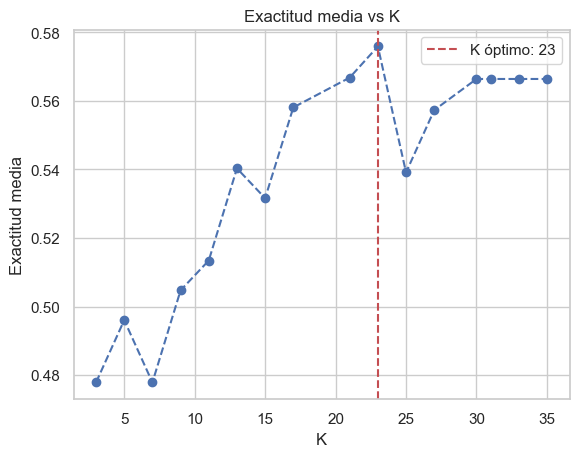

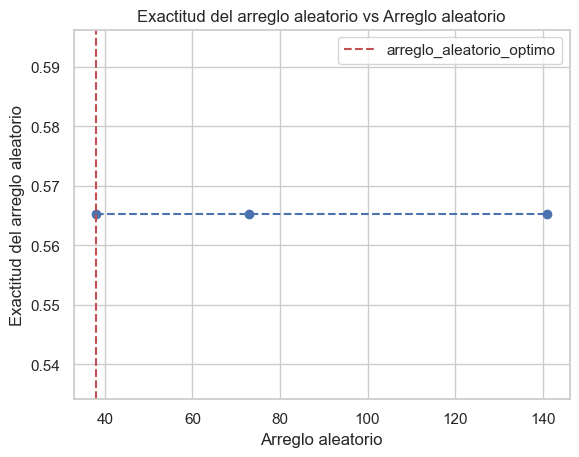

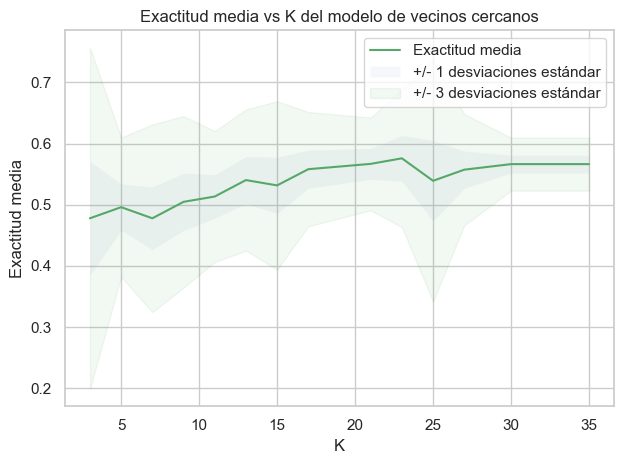

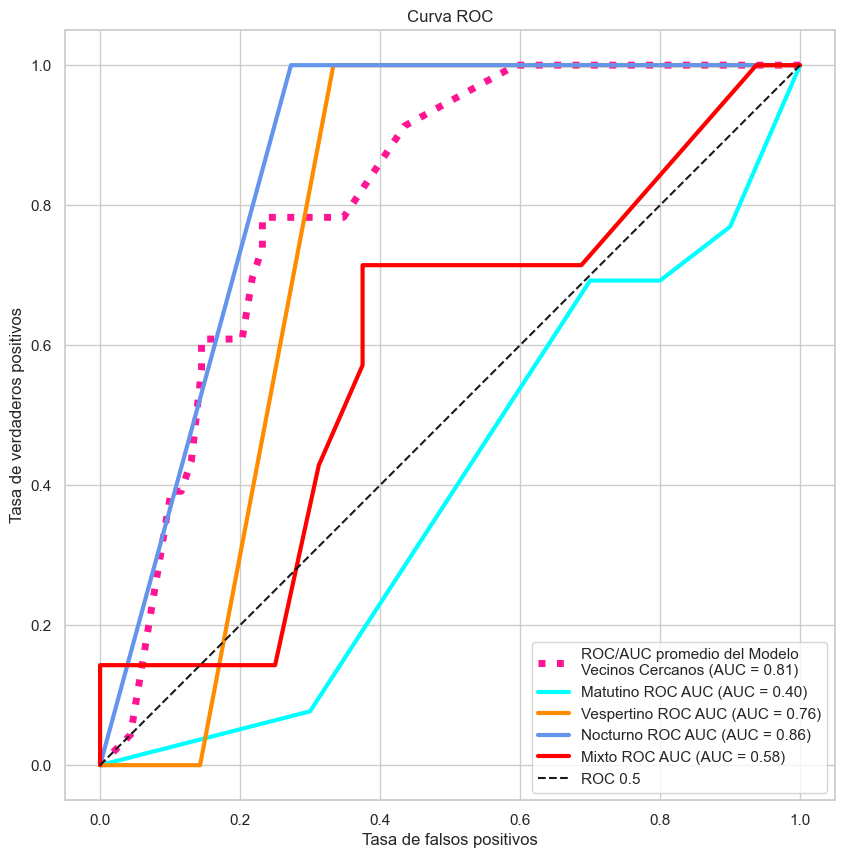

In [70]:
# Evaluamos diferentes valores de vecinos cercanos
valores_k = list([3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27, 30, 31, 33, 35])
media_exactitud_k = []
desviacion_estandar_exactitud_k = []

for k in valores_k:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size = 0.2, stratify = y)
    knnu = KNeighborsClassifier(n_neighbors = k)
    knnu.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = knnu.predict(X_prueba)
    score = cross_val_score(knnu,X, y, cv = 5, scoring = 'accuracy')
    media_exactitud_k.append(score.mean())
    desviacion_estandar_exactitud_k.append(score.std())

k_optimo = valores_k[np.argmax(media_exactitud_k)]

# Evaluamos el mejor arreglo aleatorio de los datos
exactitud_arreglo = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2, random_state=arreglo, stratify = y)
    knnu = KNeighborsClassifier(n_neighbors = k_optimo)
    knnu.fit(X_entrenamiento, y_entrenamiento)
    score = cross_val_score(knnu, X, y, cv = 5, scoring = 'accuracy')
    y_prediccion = knnu.predict(X_prueba)
    exactitud = accuracy_score(y_prueba, y_prediccion)
    exactitud_arreglo.append(exactitud)
    
media_exactitud_knnu = np.mean(exactitud_arreglo)
desviacion_estandar_knnu = np.std(exactitud_arreglo)
arreglo_aleatorio_optimo_knnu = arreglo_aleatorio[np.argmax(exactitud_arreglo)]

# Usamos el k óptimo y el arreglo aleatorio óptimo para entrenar el modelo 'knnu'
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2, random_state = arreglo_aleatorio_optimo_knnu, stratify = y)
knnu = KNeighborsClassifier(n_neighbors = k_optimo)
knnu.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = knnu.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'knnu'
# --------------------

y_puntaje_knnu = knnu.fit(
    X_entrenamiento, y_entrenamiento).predict_proba(X_prueba)

# Etiquetamos las categorías o clases
label_binarizer = LabelBinarizer().fit(y_entrenamiento)
y_onehot_prueba_knnu = label_binarizer.transform(y_prueba)

# Revisión de codificación de clases
print('Estructura de la matriz:', y_onehot_prueba_knnu.shape)
print('\nCategorías:', label_binarizer.classes_)
print('Clase Matutino:', label_binarizer.transform(["1"]))
print('Clase Vespertino:', label_binarizer.transform(["2"]))
print('Clase Nocturno:', label_binarizer.transform(["3"]))
print('Clase Mixto:', label_binarizer.transform(["4"]))

# Conversión de clases para graficar la curva ROC
clase_de_interes_1 = "1"
id_clase_1 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_1)[0]
clase_de_interes_2 = "2"
id_clase_2 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_2)[0]
clase_de_interes_3 = "3"
id_clase_3 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_3)[0]
clase_de_interes_4 = "4"
id_clase_4 = np.flatnonzero(label_binarizer.classes_ == clase_de_interes_4)[0]

# Métricas de evaluación
exactitud_knnu = accuracy_score(y_prueba, y_prediccion)
precision_knnu = precision_score(y_prueba, y_prediccion, average="weighted")
sensiblidad_knnu = recall_score(y_prueba, y_prediccion, average="weighted")
f1_knnu = f1_score(y_prueba, y_prediccion, average="weighted")

micro_roc_auc_ovr_knnu = roc_auc_score(y_prueba, y_puntaje_knnu,
                                        multi_class='ovr', average='micro')

print("\nK óptimo del modelo de vecinos cercanos:", k_optimo)
print("Arreglo aleatorio óptimo:", arreglo_aleatorio_optimo_knnu)
print("Exactitud media del modelo de vecinos cercanos:",
        round(media_exactitud_knnu, 2))
print("Desviación estándar de la exactitud del modelo de vecinos cercanos:",
        round(desviacion_estandar_knnu, 2))
matriz_confusion_knnu = confusion_matrix(y_prueba, y_prediccion)

print("Exactitud de knnu:", round(exactitud_knnu, 2))
print("Precisión de knnu:", round(precision_knnu, 2))
print("Sensibilidad de knnu:", round(sensiblidad_knnu, 2))
print("F1-score de knnu:", round(f1_knnu, 2))
print("ROC/AUC de knnu:", round(micro_roc_auc_ovr_knnu, 2))

print("\nMatriz de confusión\n:", matriz_confusion_knnu)



# --------------------
# Graficamos las métricas del modelo 'knnu'
# --------------------

# Exactitud media vs K
plt.figure()
plt.plot(valores_k, media_exactitud_k, 'o--')
plt.xlabel('K')
plt.ylabel('Exactitud media')
plt.title('Exactitud media vs K')
plt.axvline(k_optimo, color='r', linestyle='--',
            label=f'K óptimo: {k_optimo}')
plt.legend()
plt.show()

# Exactitud del arreglo aleatorio vs Arreglo aleatorio
plt.figure()
plt.plot(arreglo_aleatorio, exactitud_arreglo, 'o--')
plt.xlabel('Arreglo aleatorio')
plt.ylabel('Exactitud del arreglo aleatorio')
plt.title('Exactitud del arreglo aleatorio vs Arreglo aleatorio')
plt.axvline(arreglo_aleatorio_optimo_knnu, color='r', linestyle='--',
            label=f'arreglo_aleatorio_optimo')
plt.legend()
plt.show()

# Exactitud media vs K
plt.plot(valores_k, media_exactitud_k, "g")
plt.fill_between(
    valores_k, np.array(media_exactitud_k) - 1 * np.array(desviacion_estandar_exactitud_k),
    np.array(media_exactitud_k) + 1 * np.array(desviacion_estandar_exactitud_k), alpha = 0.05)
plt.fill_between(
    valores_k, np.array(media_exactitud_k) - 3 * np.array(desviacion_estandar_exactitud_k),
    np.array(media_exactitud_k) + 3 * np.array(desviacion_estandar_exactitud_k), alpha = 0.05, color="green")
plt.legend(("Exactitud media", "+/- 1 desviaciones estándar", "+/- 3 desviaciones estándar"))
plt.ylabel("Exactitud media")
plt.xlabel("K")
plt.title("Exactitud media vs K del modelo de vecinos cercanos")
plt.tight_layout()
plt.show()



#--------------------
# Curvas ROC

# Almacenamos los fpr, tpr, roc_auc para todos los promedios
fpr_knnu, tpr_knnu, roc_auc_knnu = dict(), dict(), dict()

# Calculamos la curva ROC y el área ROC de los promedios de tipo 'micro'
fpr_knnu['micro'], tpr_knnu['micro'], _ = roc_curve(
    y_onehot_prueba_knnu.ravel(), y_puntaje_knnu.ravel())
roc_auc_knnu['micro'] = auc(fpr_knnu['micro'], tpr_knnu['micro'])

# Gráficamos
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr_knnu['micro'],
    tpr_knnu['micro'],
    label=f"ROC/AUC promedio del Modelo \nVecinos Cercanos (AUC = {roc_auc_knnu['micro']:.2f})",
    color='deeppink',
    linestyle=':',
    linewidth=5,
)

# Mapeo entre los índices de clases y sus nombres
clase_nombres = {
    0: 'Matutino',
    1: 'Vespertino',
    2: 'Nocturno',
    3: 'Mixto'
}

for id_clase, color in zip([id_clase_1, id_clase_2, id_clase_3, id_clase_4],
                            ['aqua', 'darkorange', 'cornflowerblue', 'red']):
        RocCurveDisplay.from_predictions(
            y_onehot_prueba_knnu[:, id_clase],
            y_puntaje_knnu[:, id_clase],
            name=f"{clase_nombres[id_clase]} ROC AUC", 
            color=color,
            linewidth=3,
            ax=ax,
        )

plt.plot([0, 1], [0, 1], 'k--', label='ROC 0.5')
plt.axis('square')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

##### Elección del mejor modelo

In [71]:
# Creamos diccionarios para elegir el mejor modelo
modelosu = {
    'modelo_arbolu_diccionario': {
        'modelo': arbolu,
        'exactitud': exactitud_arbolu,
        'precision': precision_arbolu,
        'sensibilidad': sensibilidad_arbolu,
        'f1': f1_arbolu,
        'micro_roc_auc': micro_roc_auc_ovr_arbolu,
        'matriz_confusion': matriz_confusion_arbolu,
        'fpr': fpr_arbolu,
        'tpr': tpr_arbolu,
        'roc_auc': roc_auc_arbolu
    },
    'modelo_bosqueu_diccionario': {
        'modelo': bosqueu,
        'exactitud': exactitud_bosqueu,
        'precision': precision_bosqueu,
        'sensibilidad': sensiblidad_bosqueu,
        'f1': f1_bosqueu,
        'micro_roc_auc': micro_roc_auc_ovr_bosqueu,
        'matriz_confusion': matriz_confusion_bosqueu,
        'fpr': fpr_bosqueu,
        'tpr': tpr_bosqueu,
        'roc_auc': roc_auc_bosqueu
    },
    'modelo_knnu_diccionario': {
        'modelo': knnu,
        'exactitud': exactitud_knnu,
        'precision': precision_knnu,
        'sensibilidad': sensiblidad_knnu,
        'f1': f1_knnu,
        'micro_roc_auc': micro_roc_auc_ovr_knnu,
        'matriz_confusion': matriz_confusion_knnu,
        'fpr': fpr_knnu,
        'tpr': tpr_knnu,
        'roc_auc': roc_auc_knnu
    }
}

# Accesamos a los diccionarios
arbolu_dict = modelosu['modelo_arbolu_diccionario']
bosqueu_dict = modelosu['modelo_bosqueu_diccionario']
knnu_dict = modelosu['modelo_knnu_diccionario']

# Comparamos la exactitud, precision, sensibilidad, f1, micro_roc_aic de los modelos

# -------------------- #
# Exactitud
# -------------------- #
if arbolu_dict['exactitud'] > bosqueu_dict['exactitud'] and arbolu_dict['exactitud'] > knnu_dict['exactitud']:
    print(f"Mejor exactitud: \n     arbolu ({arbolu_dict['exactitud']:.2f})")
elif bosqueu_dict['exactitud'] > arbolu_dict['exactitud'] and bosqueu_dict['exactitud'] > knnu_dict['exactitud']:
    print(f"Mejor exactitud: \n     bosqueu ({bosqueu_dict['exactitud']:.2f})")
else:
    print(f"Mejor exactitud: \n     knnu ({knnu_dict['exactitud']:.2f})")

# -------------------- #
# Precisión
# -------------------- #

if arbolu_dict['precision'] > bosqueu_dict['precision'] and arbolu_dict['precision'] > knnu_dict['precision']:
    print(f"Mejor precision: \n     arbolu ({arbolu_dict['precision']:.2f})")
elif bosqueu_dict['precision'] > arbolu_dict['precision'] and bosqueu_dict['precision'] > knnu_dict['precision']:
    print(f"Mejor precision: \n     bosqueu ({bosqueu_dict['precision']:.2f})")
else:
    print(f"Mejor precision: \n     knnu ({knnu_dict['precision']:.2f})")

# -------------------- #
# Sensibilidad
# -------------------- #

if arbolu_dict['sensibilidad'] > bosqueu_dict['sensibilidad'] and arbolu_dict['sensibilidad'] > knnu_dict['sensibilidad']:
    print(f"Mejor sensibilidad: \n     arbolu ({arbolu_dict['sensibilidad']:.2f})")
elif bosqueu_dict['sensibilidad'] > arbolu_dict['sensibilidad'] and bosqueu_dict['sensibilidad'] > knnu_dict['sensibilidad']:
    print(f"Mejor sensibilidad: \n     bosqueu ({bosqueu_dict['sensibilidad']:.2f})")
else:
    print(f"Mejor sensibilidad: \n     knnu ({knnu_dict['sensibilidad']:.2f})")

# -------------------- #
# F1
# -------------------- #

if arbolu_dict['f1'] > bosqueu_dict['f1'] and arbolu_dict['f1'] > knnu_dict['f1']:
    print(f"Mejor f1: \n     arbolu ({arbolu_dict['f1']:.2f})")
elif bosqueu_dict['f1'] > arbolu_dict['f1'] and bosqueu_dict['f1'] > knnu_dict['f1']:
    print(f"Mejor f1: \n     bosqueu ({bosqueu_dict['f1']:.2f})")
else:
    print(f"Mejor f1: \n     knnu ({knnu_dict['f1']:.2f})")

# -------------------- #
# ROC/AUC
# -------------------- #

if arbolu_dict['micro_roc_auc'] > bosqueu_dict['micro_roc_auc'] and arbolu_dict['micro_roc_auc'] > knnu_dict['micro_roc_auc']:
    print(f"Mejor micro_roc_auc: \n     arbolu ({arbolu_dict['micro_roc_auc']:.2f})")
elif bosqueu_dict['micro_roc_auc'] > arbolu_dict['micro_roc_auc'] and bosqueu_dict['micro_roc_auc'] > knnu_dict['micro_roc_auc']:
    print(f"Mejor micro_roc_auc: \n     bosqueu ({bosqueu_dict['micro_roc_auc']:.2f})")
else:
    print(f"Mejor micro_roc_auc: \n     knnu ({knnu_dict['micro_roc_auc']:.2f})")


# Creamos una lista de tuplas con el nombre de los modelos y los valores de las métricas principales
eleccion_modelou = [('arbolu', arbolu_dict['exactitud'], arbolu_dict['precision'], 
                     arbolu_dict['sensibilidad'], arbolu_dict['f1'], arbolu_dict['micro_roc_auc']),
                    ('bosqueu', bosqueu_dict['exactitud'], bosqueu_dict['precision'], 
                     bosqueu_dict['sensibilidad'], bosqueu_dict['f1'], bosqueu_dict['micro_roc_auc']),
                    ('knnu', knnu_dict['exactitud'], knnu_dict['precision'], 
                     knnu_dict['sensibilidad'], knnu_dict['f1'], knnu_dict['micro_roc_auc'])]

# Ordenamos la lista en orden descendente por el valor de exactitud, precision, sensibilidad, f1 y micro_roc_auc
eleccion_modelou.sort(key=lambda x: (x[1], x[2], x[3], x[4], x[5]), reverse=True)

# Seleccionamos el primer elemento de la lista como el mejor modelo
mejor_modelou = eleccion_modelou[0][0]

print(f"\nEl mejor modelo basado en exactitud, precisión, sensibilidad, f1 y micro_roc_auc es: {mejor_modelou}")

Mejor exactitud: 
     bosqueu (0.74)
Mejor precision: 
     bosqueu (0.64)
Mejor sensibilidad: 
     bosqueu (0.74)
Mejor f1: 
     bosqueu (0.69)
Mejor micro_roc_auc: 
     bosqueu (0.90)

El mejor modelo basado en exactitud, precisión, sensibilidad, f1 y micro_roc_auc es: bosqueu


In [72]:
# REVISAR SI "COLUMNAS_A_ESTANDARIZAR", "MEDIAS_COLUMNAS" Y "DESVIACIONES_COLUMNAS" SON LAS CORRESPONDIENTES

# Imputaremos y guardaremos los valores perdidos, agregando la variable objetivo en un nuevo dataframe
mejor_modelou_obj = modelosu[f"modelo_{mejor_modelou}_diccionario"]['modelo']

prediccion_perdidosu = mejor_modelou_obj.predict(X_perdidos)

# Se agrega la variale objetivo a un nuevo dataframe con el método .loc
datos_con_valores_perdidos.loc[:, variable_objetivo] = prediccion_perdidosu
datos_llenados = pd.concat(
    [datos_sin_valores_perdidos,
     datos_con_valores_perdidos],
     axis = 0
)

datos_completos.update(datos_llenados)

df_imu = desestandarizar_columnas(
    datos_completos,
    columnas_a_estandarizar,
    medias_columnas,
    desviaciones_columnas
)

exportar_imputados_a_excel(df_imu, 'turno') 
#df_imu = Dataframe Imputados Modelo U 'Turno'


# -------------------- #
# Estandarizamos df_imu (en df_imue) para ingresar al modelo de tension_sistolica
# -------------------- #

# Primero copiamos los dataframes
df_imue = df_imu.copy() 
# df_imue = Dataframe Imputados Modelo U Estandarizado

# Segundo convertimos las variables categóricas a numéricas
df_imue['s'] = df_imue['s'].astype(float)
df_imue['u'] = df_imue['u'].astype(float)

# Tercero estandarizamos df_imue
df_imue = estandarizar_todas_columnas(
    df_imue,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

/var/folders/28/0lfytjkn0870ys5gfs8vhl_m0000gn/T/ipykernel_3853/396372205.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  datos_con_valores_perdidos.loc[:, variable_objetivo] = prediccion_perdidosu


### Métodos de Regresión

#### Variable "ts" (Tensión Sistólica)

In [73]:
# Segmentamos los datos

# Separamos la variable objetivo, las variables incluidas 
# y excluidas del modelo

columnas_seleccionadas = ['e', 's', 'u', 'p', 
                     't', 'ts', 'td', 'gs', 
                     'c', 'hdl', 'cc', 'pp', 
                     'imc', 'cct', 'cnhdl', 'chdl']
datos_completos = df_imue.copy() # df_imue = dataframe imputados modelo u estandarizado
datos = df_imue[columnas_seleccionadas]
datos.sort_index(inplace = True)
variable_objetivo = 'ts'
variables_predictoras = [columna for columna in datos.columns if
                         columna != variable_objetivo and columna not in
                         ['td', 'cc', 'cct', 'pp']]

# Separamos los datos en predictoras y objetivo
datos_con_valores_perdidos = datos[datos[variable_objetivo].isnull()].copy()
datos_sin_valores_perdidos = datos.dropna()
X = datos_sin_valores_perdidos[variables_predictoras]
y = datos_sin_valores_perdidos[variable_objetivo]

X_perdidos = datos_con_valores_perdidos[variables_predictoras]

##### Arból de decisión

In [74]:
depths = list(range(3, 25))
r2_profundidad_ts = []

for depth in depths:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2)
    arbolts = DecisionTreeRegressor(max_depth = depth)
    arbolts.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = arbolts.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_profundidad_ts.append(r2)

profundidad_optima_ts = depths[np.argmax(r2_profundidad_ts)]

# Evaluamos el mejor arreglo aleatorio de los datos
r2_arreglo_arbolts = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2, random_state = arreglo)
    arbolts = DecisionTreeRegressor(max_depth = profundidad_optima_ts)
    arbolts.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = arbolts.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_arreglo_arbolts.append(r2)

arreglo_aleatorio_optimo_arbolts = arreglo_aleatorio[np.argmax(r2_arreglo_arbolts)]

# Usamos la profundidad óptima y el arreglo aleatorio óptimo para entrenar el modelo 'arbolts'

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2, 
    random_state = arreglo_aleatorio_optimo_arbolts)
arbolts = DecisionTreeRegressor(max_depth = profundidad_optima_ts)
arbolts.fit(X_entrenamiento, y_entrenamiento)
y_prediccion_arbolts = arbolts.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'arbolts'
# --------------------

mae_arbolts = mean_absolute_error(y_prueba, y_prediccion_arbolts)
mse_arbolts = mean_squared_error(y_prueba, y_prediccion_arbolts)
rmse_arbolts = np.sqrt(mse_arbolts)
r2_arbolts = r2_score(y_prueba, y_prediccion_arbolts)

print("Error absoluto medio de arbolts:", round(mae_arbolts, 2))
print("Error cuadrático medio de arbolts:", round(mse_arbolts, 2))
print("Raíz del error cuadrático medio de arbolts:", round(rmse_arbolts, 2))
print("R-cuadrado de arbolts:", round((r2_arbolts), 2))

Error absoluto medio de arbolts: 0.49
Error cuadrático medio de arbolts: 0.5
Raíz del error cuadrático medio de arbolts: 0.71
R-cuadrado de arbolts: -0.03


##### Bosque aleatorio

In [75]:
estimadores = list(range(100, 125))
r2_estimadores_ts = []

for estimador in estimadores:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2)
    bosquets = RandomForestRegressor(n_estimators = estimador)
    bosquets.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = bosquets.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_estimadores_ts.append(r2)

estimador_optimo_ts = estimadores[np.argmax(r2_estimadores_ts)]

# Evaluamos el mejor arreglo aleatorio de los datos
r2_arreglo_bosquets = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2, random_state = arreglo)
    bosquets = RandomForestRegressor(n_estimators = estimador_optimo_ts)
    bosquets.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = bosquets.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_arreglo_bosquets.append(r2)

arreglo_aleatorio_optimo_bosquets = arreglo_aleatorio[np.argmax(r2_arreglo_bosquets)]

# Usamos el estimador óptimo y el arreglo aleatorio óptimo para entrenar el modelo 'bosquets'

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2, 
    random_state = arreglo_aleatorio_optimo_bosquets)
bosquets = RandomForestRegressor(n_estimators = estimador_optimo_ts)
bosquets.fit(X_entrenamiento, y_entrenamiento)
y_prediccion_bosquets = bosquets.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'bosquets'
# --------------------

mae_bosquets = mean_absolute_error(y_prueba, y_prediccion_bosquets)
mse_bosquets = mean_squared_error(y_prueba, y_prediccion_bosquets)
rmse_bosquets = np.sqrt(mse_bosquets)
r2_bosquets = r2_score(y_prueba, y_prediccion_bosquets)

print("Error absoluto medio de bosquets:", round(mae_bosquets, 2))
print("Error cuadrático medio de bosquets:", round(mse_bosquets, 2))
print("Raíz del error cuadrático medio de bosquets:", round(rmse_bosquets, 2))
print("R-cuadrado de bosquets:", round(r2_bosquets, 2))

Error absoluto medio de bosquets: 0.36
Error cuadrático medio de bosquets: 0.28
Raíz del error cuadrático medio de bosquets: 0.53
R-cuadrado de bosquets: 0.42


##### KNN

In [76]:
valores_k = list([3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27, 30, 31, 33, 35])
r2_k_ts = []

for k in valores_k:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size = 0.2)
    knnts = KNeighborsRegressor(n_neighbors = k)
    knnts.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = knnts.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_k_ts.append(r2)

k_optimo_ts = valores_k[np.argmax(r2_k_ts)]

# Evaluamos el mejor arreglo aleatorio de los datos
r2_arreglo_knnts = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2, random_state=arreglo)
    knnts = KNeighborsRegressor(n_neighbors = k_optimo_ts)
    knnts.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = knnts.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_arreglo_knnts.append(r2)

arreglo_aleatorio_optimo_knnts = arreglo_aleatorio[np.argmax(r2_arreglo_knnts)]

# Usamos el k óptimo y el arreglo aleatorio óptimo para entrenar el modelo 'knnts'

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2, 
    random_state = arreglo_aleatorio_optimo_knnts)
knnts = KNeighborsRegressor(n_neighbors = k_optimo_ts)
knnts.fit(X_entrenamiento, y_entrenamiento)
y_prediccion_knnts = knnts.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'knnts'
# --------------------

mae_knnts = mean_absolute_error(y_prueba, y_prediccion_knnts)
mse_knnts = mean_squared_error(y_prueba, y_prediccion_knnts)
rmse_knnts = np.sqrt(mse_knnts)
r2_knnts = r2_score(y_prueba, y_prediccion_knnts)

print("Error absoluto medio de knnts:", round(mae_knnts, 2))
print("Error cuadrático medio de knnts:", round(mse_knnts, 2))
print("Raíz del error cuadrático medio de knnts:", round(rmse_knnts, 2))
print("R-cuadrado de knnts:", round(r2_knnts, 2))

Error absoluto medio de knnts: 0.46
Error cuadrático medio de knnts: 0.39
Raíz del error cuadrático medio de knnts: 0.63
R-cuadrado de knnts: 0.19


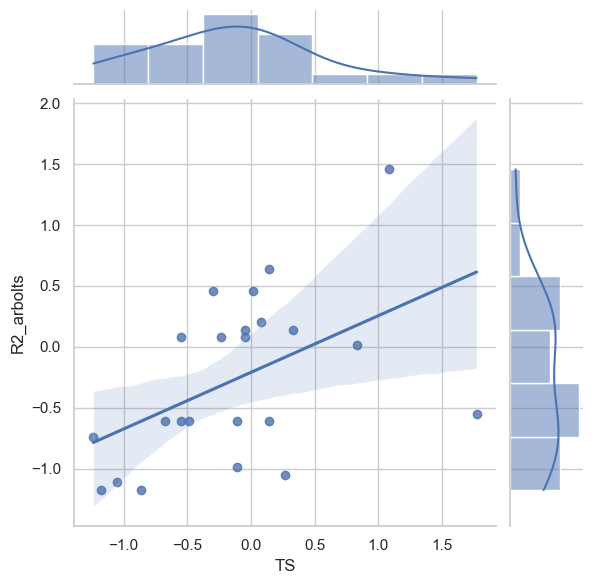

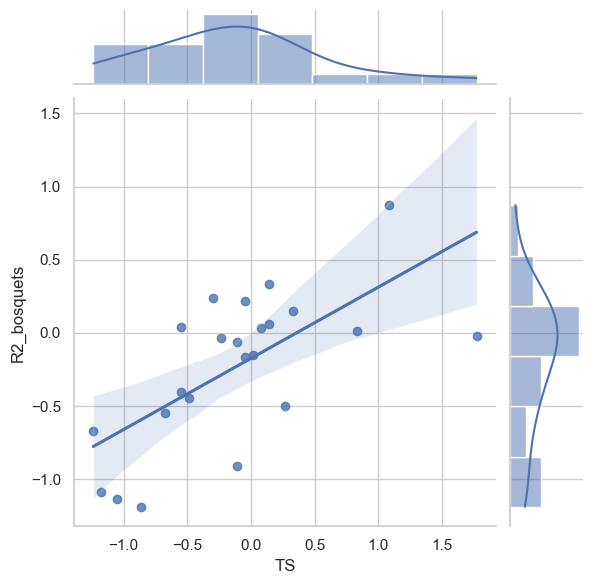

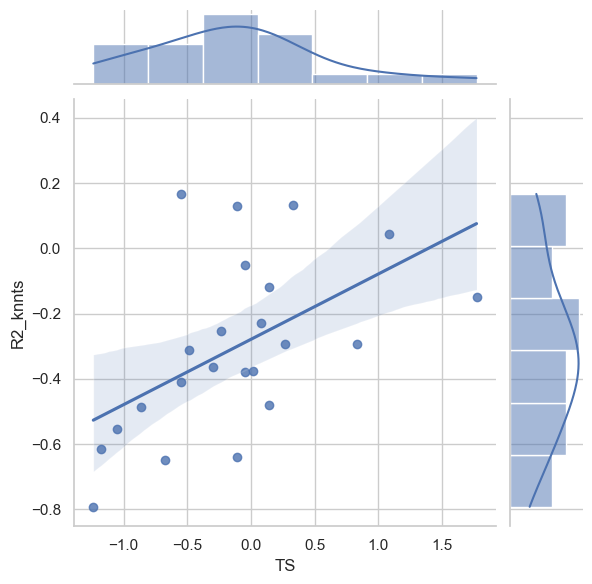

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un DataFrame con las variables que queremos graficar
data = pd.DataFrame({
    'TS': y_prueba,
    'R2_arbolts': y_prediccion_arbolts,
    'R2_bosquets': y_prediccion_bosquets,
    'R2_knnts': y_prediccion_knnts
})

# Creamos el jointplot
sns.jointplot(x='TS', y='R2_arbolts', data=data, kind='reg')
sns.jointplot(x='TS', y='R2_bosquets', data=data, kind='reg')
sns.jointplot(x='TS', y='R2_knnts', data=data, kind='reg')

# Mostramos el gráfico
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un DataFrame con las variables que queremos graficar
data = pd.DataFrame({
    'TS': y_prueba,
    'R2_arbolts': y_prediccion_arbolts,
    'R2_bosquets': y_prediccion_bosquets,
    'R2_knnts': y_prediccion_knnts
})

# Creamos el pairplot
sns.pairplot(data)

# Mostramos el gráfico
plt.show()


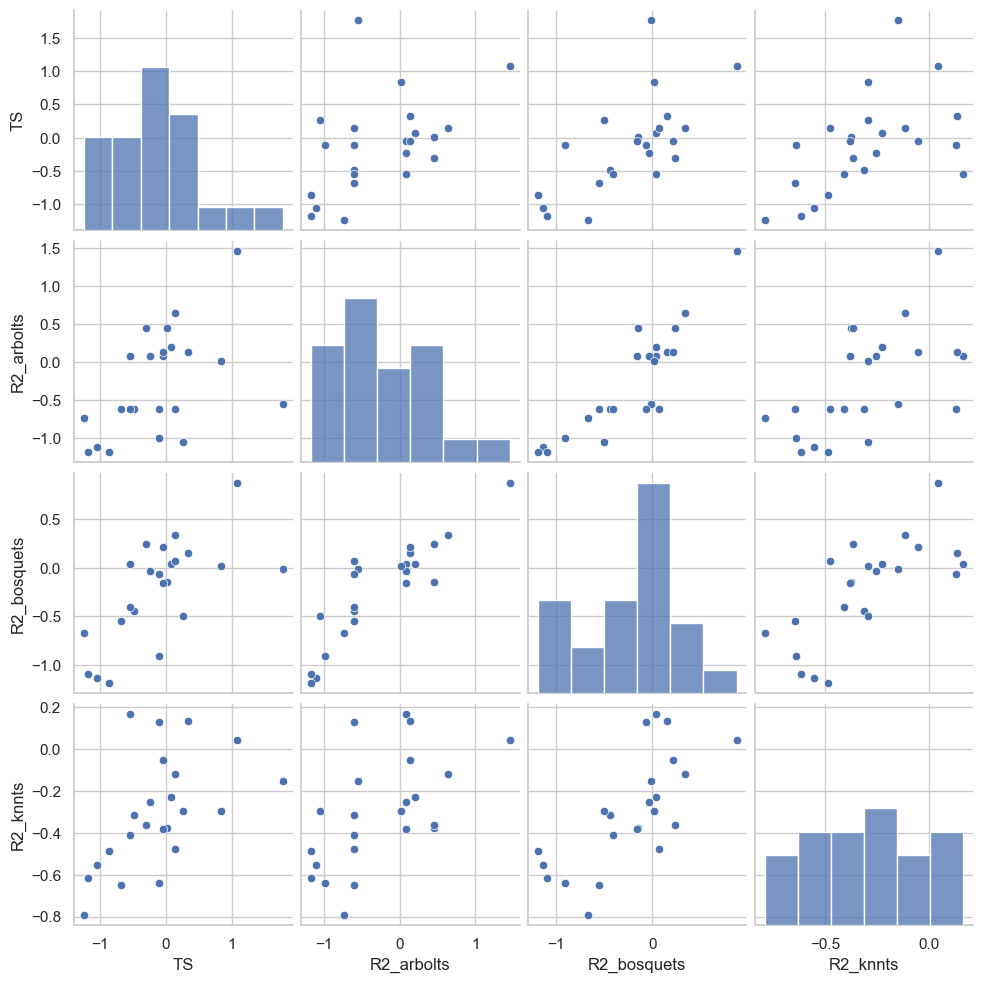

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un DataFrame con las variables que queremos graficar
data = pd.DataFrame({
    'TS': y_prueba,
    'R2_arbolts': y_prediccion_arbolts,
    'R2_bosquets': y_prediccion_bosquets,
    'R2_knnts': y_prediccion_knnts
})

# Creamos el pairplot
sns.pairplot(data)

# Mostramos el gráfico
plt.show()

help me to create a relation plot with r2_arbolts, r2_bosquets and ts_knnts


----------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un dataframe con las métricas de los modelos
data = {'Modelo': ['Arbolts', 'Bosquets', 'Knnts'], 
        'R-cuadrado': [r2_arbolts, r2_bosquets, r2_knnts]}
df = pd.DataFrame(data)

# Creamos el gráfico
sns.set(style="whitegrid")
ax = sns.scatterplot(x="Modelo", y="R-cuadrado", data=df)

# Agregamos los valores en las barras
for i, v in enumerate(df['R-cuadrado']):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center')

# Agregamos el título y etiquetas de los ejes
ax.set_title('R-cuadrado de los modelos')
ax.set_xlabel('Modelo')
ax.set_ylabel('R-cuadrado')

# Mostramos el gráfico
plt.show()


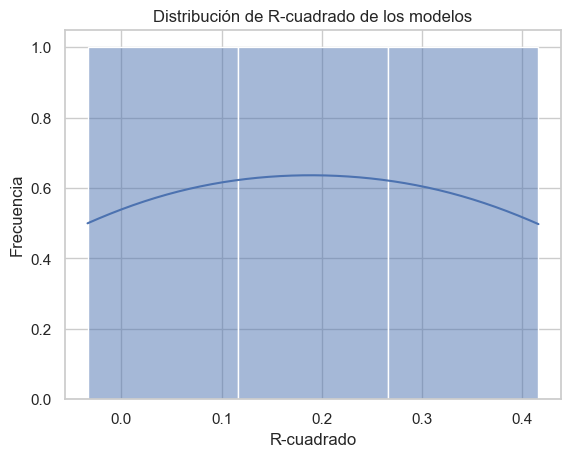

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe with the R-squared values of the three models
data = {'Modelo': ['Arbolts', 'Bosquets', 'Knnts'], 
    'R-cuadrado': [r2_arbolts, r2_bosquets, r2_knnts]}
df = pd.DataFrame(data)

# Create the distribution plot
sns.set(style="whitegrid")
ax = sns.histplot(data=df, x="R-cuadrado", kde=True)

# Add the title and axis labels
ax.set_title('Distribución de R-cuadrado de los modelos')
ax.set_xlabel('R-cuadrado')
ax.set_ylabel('Frecuencia')

# Show the plot
plt.show()


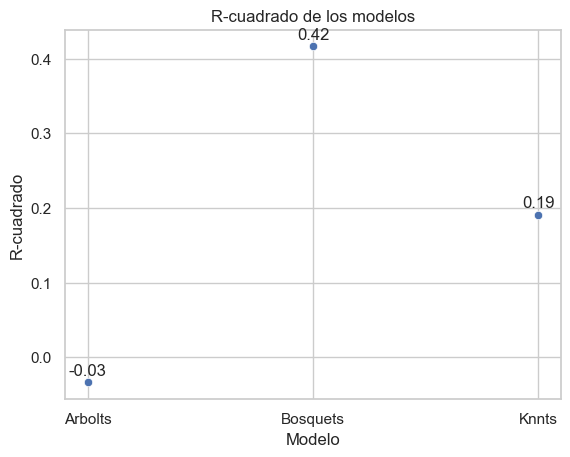

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un dataframe con las métricas de los modelos
data = {'Modelo': ['Arbolts', 'Bosquets', 'Knnts'], 
        'R-cuadrado': [r2_arbolts, r2_bosquets, r2_knnts]}
df = pd.DataFrame(data)

# Creamos el gráfico
sns.set(style="whitegrid")
ax = sns.scatterplot(x="Modelo", y="R-cuadrado", data=df)

# Agregamos los valores en las barras
for i, v in enumerate(df['R-cuadrado']):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center')

# Agregamos el título y etiquetas de los ejes
ax.set_title('R-cuadrado de los modelos')
ax.set_xlabel('Modelo')
ax.set_ylabel('R-cuadrado')

# Mostramos el gráfico
plt.show()


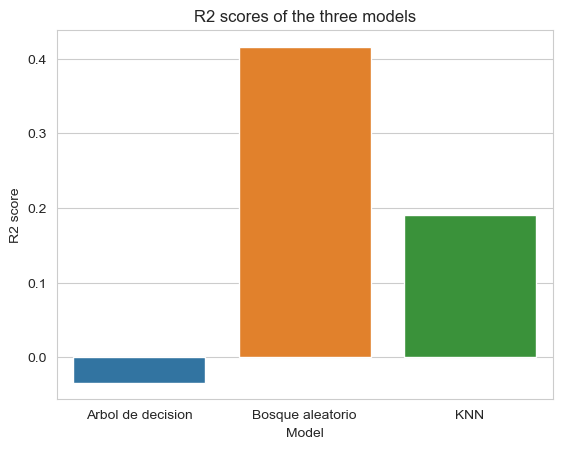

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary with the R2 scores of the three models
r2_scores = {'Arbol de decision': r2_arbolts, 'Bosque aleatorio': r2_bosquets, 'KNN': r2_knnts}

# Convert the dictionary to a Pandas DataFrame
df_r2_scores = pd.DataFrame.from_dict(r2_scores, orient='index', columns=['R2'])

# Create a scatter plot with the R2 scores
sns.relplot(x=df_r2_scores.index, y=df_r2_scores['R2'], kind='line')
plt.title('R2 scores of the three models')
plt.xlabel('Model')
plt.ylabel('R2 score')
plt.show()


##### Elección del mejor modelo

In [22]:
modelosts = {
    'arbolts': {
        'modelo': arbolts,
        'mae': mae_arbolts,
        'mse': mse_arbolts,
        'rmse': rmse_arbolts,
        'r2': r2_arbolts
    },
    'bosquets': {
        'modelo': bosquets,
        'mae': mae_bosquets,
        'mse': mse_bosquets,
        'rmse': rmse_bosquets,
        'r2': r2_bosquets
    },
    'knnts': {
        'modelo': knnts,
        'mae': mae_knnts,
        'mse': mse_knnts,
        'rmse': rmse_knnts,
        'r2': r2_knnts
    }
}

metricas_a_comparar = {
    'rmse': 'Raíz del Error Cuadrático Medio',
    'mae': 'Error Absoluto Medio',
    'r2': 'R-cuadrado',
    'mse': 'Error Cuadrático Medio'
}

for metrica, descripcion in metricas_a_comparar.items():
    mejor_modelo_ts = min(modelosts, key = lambda x: modelosts[x][metrica] if metrica != 'r2' else -modelosts[x][metrica])
    mejor_resultado = modelosts[mejor_modelo_ts][metrica]
    print(f"Mejor {descripcion} ({metrica}): \n {mejor_modelo_ts} ({mejor_resultado:.2f})")

# Basado en todas las métricas, seleccionamos el modelo general para predicción de tensión sistólica
mejor_modelogeneral_ts = max(
    modelosts,
    key = lambda x: (
        -modelosts[x]['rmse'],
        -modelosts[x]['mae'],
        modelosts[x]['r2'],
        -modelosts[x]['mse']
    )
)

print(f"\nEl mejor modelo para predicción de tensión sistólica basado en Raíz del Error Cuadrático Medio (rmse) > Error Absoluto Medio (mae) > R-cuadrado (r2) > Error Cuadrático Medio (mse) es:\n {mejor_modelogeneral_ts}")

Mejor Raíz del Error Cuadrático Medio (rmse): 
 bosquets (0.53)
Mejor Error Absoluto Medio (mae): 
 bosquets (0.36)
Mejor R-cuadrado (r2): 
 bosquets (0.42)
Mejor Error Cuadrático Medio (mse): 
 bosquets (0.28)

El mejor modelo para predicción de tensión sistólica basado en Raíz del Error Cuadrático Medio (rmse) > Error Absoluto Medio (mae) > R-cuadrado (r2) > Error Cuadrático Medio (mse) es:
 bosquets


In [23]:
# Imputaremos y guardaremos los valores perdidos, agregando la variable objetivo en un nuevo dataframe
mejor_modelots_obj = modelosts[mejor_modelogeneral_ts]['modelo']

prediccion_perdidosts = mejor_modelots_obj.predict(X_perdidos)

# Se agrega la variable objetivo a un nuevo dataframe con el método .loc
datos_con_valores_perdidos.loc[:, variable_objetivo] = prediccion_perdidosts
datos_llenados = pd.concat(
    [datos_sin_valores_perdidos,
     datos_con_valores_perdidos],
     axis = 0
)

datos_completos.update(datos_llenados)

df_imts = desestandarizar_todas_columnas(
    datos_completos,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

exportar_imputados_a_excel(df_imts, 'tension_sistolica')
# df_imts = Dataframe Imputados Modelo TS 'Tensión Sistólica'

# -------------------- #
# Estandarizamos df_imts (en df_imtse) para ingresar al modelo de Tensión Diastólica (td)
# -------------------- #

# Primero copiamos los dataframes
df_imtse = df_imts.copy()
# df_imtse = Dataframe Imputados Modelo TS Estandarizado

# Segundo estandarizamos df_imtse
df_imtse = estandarizar_todas_columnas(
    df_imtse,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

#### Variable "td" (Tensión Diastólica)

In [24]:
# Segmentamos los datos

# Separamos la variable objetivo, las variables incluidas
# y excluidas del modelo

columnas_seleccionadas = ['e', 's', 'u', 'p',
                        't', 'ts', 'td', 'gs',
                        'c', 'hdl', 'cc', 'pp',
                        'imc', 'cct', 'cnhdl', 'chdl']
datos_completos = df_imtse.copy() # df_imtse = dataframe imputados modelo ts estandarizado
datos = df_imtse[columnas_seleccionadas]
datos.sort_index(inplace = True)
variable_objetivo = 'td'
variables_predictoras = [columna for columna in datos.columns if
                         columna != variable_objetivo and columna not in
                         ['cc', 'cct', 'pp']]

# Separamos los datos en predictoras y objetivo
datos_con_valores_perdidos = datos[datos[variable_objetivo].isnull()].copy()
datos_sin_valores_perdidos = datos.dropna()
X = datos_sin_valores_perdidos[variables_predictoras]
y = datos_sin_valores_perdidos[variable_objetivo]

X_perdidos = datos_con_valores_perdidos[variables_predictoras]

##### Arból de decisión

In [25]:
depths = list(range(3, 25))
r2_profundidad_td = []

for profundidad in depths:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2)
    arboltd = DecisionTreeRegressor(max_depth = profundidad)
    arboltd.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = arboltd.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_profundidad_td.append(r2)

profundidad_optima_td = depths[np.argmax(r2_profundidad_td)]

# Evaluamos el mejor arreglo aleatorio de los datos
r2_arreglo_arboltd = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2, random_state = arreglo)
    arboltd = DecisionTreeRegressor(max_depth = profundidad_optima_td)
    arboltd.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = arboltd.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_arreglo_arboltd.append(r2)

arreglo_aleatorio_optimo_arboltd = arreglo_aleatorio[np.argmax(r2_arreglo_arboltd)]

# Usamos la profundidad óptima y el arreglo aleatorio óptimo para entrenar el modelo 'arboltd'

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2,
    random_state = arreglo_aleatorio_optimo_arboltd)
arboltd = DecisionTreeRegressor(max_depth = profundidad_optima_td)
arboltd.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = arboltd.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'arboltd'
# --------------------

mae_arboltd = mean_absolute_error(y_prueba, y_prediccion)
mse_arboltd = mean_squared_error(y_prueba, y_prediccion)
rmse_arboltd = np.sqrt(mse_arboltd)
r2_arboltd = r2_score(y_prueba, y_prediccion)

print("Error absoluto medio de arboltd:", round(mae_arboltd, 2))
print("Error cuadrático medio de arboltd:", round(mse_arboltd, 2))
print("Raíz del error cuadrático medio de arboltd:", round(rmse_arboltd, 2))
print("R-cuadrado de arboltd:", round(r2_arboltd, 2))

Error absoluto medio de arboltd: 0.41
Error cuadrático medio de arboltd: 0.24
Raíz del error cuadrático medio de arboltd: 0.49
R-cuadrado de arboltd: 0.65


##### Bosque aleatorio

In [26]:
estimadores = list(range(100, 125))
r2_estimadores_td = []

for estimador in estimadores:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2)
    bosquetd = RandomForestRegressor(n_estimators = estimador)
    bosquetd.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = bosquetd.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_estimadores_td.append(r2)

estimador_optimo_td = estimadores[np.argmax(r2_estimadores_td)]

# Evaluamos el mejor arreglo aleatorio de los datos
r2_arreglo_bosquetd = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2, random_state = arreglo)
    bosquetd = RandomForestRegressor(n_estimators = estimador_optimo_td)
    bosquetd.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = bosquetd.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_arreglo_bosquetd.append(r2)

arreglo_aleatorio_optimo_bosquetd = arreglo_aleatorio[np.argmax(r2_arreglo_bosquetd)]

# Usamos el estimador óptimo y el arreglo aleatorio óptimo para entrenar el modelo 'bosquetd'

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2,
    random_state = arreglo_aleatorio_optimo_bosquetd)
bosquetd = RandomForestRegressor(n_estimators = estimador_optimo_td)
bosquetd.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = bosquetd.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'bosquetd'
# --------------------

mae_bosquetd = mean_absolute_error(y_prueba, y_prediccion)
mse_bosquetd = mean_squared_error(y_prueba, y_prediccion)
rmse_bosquetd = np.sqrt(mse_bosquetd)
r2_bosquetd = r2_score(y_prueba, y_prediccion)

print("Error absoluto medio de bosquetd:", round(mae_bosquetd, 2))
print("Error cuadrático medio de bosquetd:", round(mse_bosquetd, 2))
print("Raíz del error cuadrático medio de bosquetd:", round(rmse_bosquetd, 2))
print("R-cuadrado de bosquetd:", round(r2_bosquetd, 2))

Error absoluto medio de bosquetd: 0.45
Error cuadrático medio de bosquetd: 0.31
Raíz del error cuadrático medio de bosquetd: 0.55
R-cuadrado de bosquetd: 0.56


##### KNN

In [27]:
valores_k = list([3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27, 30, 31, 33, 35])
r2_k_td = []

for k in valores_k:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size = 0.2)
    knntd = KNeighborsRegressor(n_neighbors = k)
    knntd.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = knntd.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_k_td.append(r2)

k_optimo_td = valores_k[np.argmax(r2_k_td)]

# Evaluamos el mejor arreglo aleatorio de los datos
r2_arreglo_knntd = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2, random_state=arreglo)
    knntd = KNeighborsRegressor(n_neighbors = k_optimo_td)
    knntd.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = knntd.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_arreglo_knntd.append(r2)

arreglo_aleatorio_optimo_knntd = arreglo_aleatorio[np.argmax(r2_arreglo_knntd)]

# Usamos el k óptimo y el arreglo aleatorio óptimo para entrenar el modelo 'knntd'

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2,
    random_state = arreglo_aleatorio_optimo_knntd)
knntd = KNeighborsRegressor(n_neighbors = k_optimo_td)
knntd.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = knntd.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'knntd'
# --------------------

mae_knntd = mean_absolute_error(y_prueba, y_prediccion)
mse_knntd = mean_squared_error(y_prueba, y_prediccion)
rmse_knntd = np.sqrt(mse_knntd)
r2_knntd = r2_score(y_prueba, y_prediccion)

print("Error absoluto medio de knntd:", round(mae_knntd, 2))
print("Error cuadrático medio de knntd:", round(mse_knntd, 2))
print("Raíz del error cuadrático medio de knntd:", round(rmse_knntd, 2))
print("R-cuadrado de knntd:", round(r2_knntd, 2))

Error absoluto medio de knntd: 0.56
Error cuadrático medio de knntd: 0.65
Raíz del error cuadrático medio de knntd: 0.8
R-cuadrado de knntd: 0.06


##### Elección del mejor modelo

In [28]:
modelostd = {
    'arboltd': {
        'modelo': arboltd,
        'mae': mae_arboltd,
        'mse': mse_arboltd,
        'rmse': rmse_arboltd,
        'r2': r2_arboltd
    },
    'bosquetd': {
        'modelo': bosquetd,
        'mae': mae_bosquetd,
        'mse': mse_bosquetd,
        'rmse': rmse_bosquetd,
        'r2': r2_bosquetd
    },
    'knntd': {
        'modelo': knntd,
        'mae': mae_knntd,
        'mse': mse_knntd,
        'rmse': rmse_knntd,
        'r2': r2_knntd
    }
}

metricas_a_comparar = {
    'rmse': 'Raíz del Error Cuadrático Medio',
    'mae': 'Error Absoluto Medio',
    'r2': 'R-cuadrado',
    'mse': 'Error Cuadrático Medio'
}

for metrica, descripcion in metricas_a_comparar.items():
    mejor_modelo_td = min(modelostd, key = lambda x: modelostd[x][metrica] if metrica != 'r2' else -modelostd[x][metrica])
    mejor_resultado = modelostd[mejor_modelo_td][metrica]
    print(f"Mejor {descripcion} ({metrica}): \n {mejor_modelo_td} ({mejor_resultado:.2f})")

# Basado en todas las métricas, seleccionamos el modelo general para predicción de tensión diastólica
mejor_modelo_td = max(
    modelostd,
    key = lambda x: (
        -modelostd[x]['rmse'],
        -modelostd[x]['mae'],
        modelostd[x]['r2'],
        -modelostd[x]['mse']
    )
)

print(f"\nEl mejor modelo para predicción de tensión diastólica basado en Raíz del Error Cuadrático Medio (rmse) > Error Absoluto Medio (mae) > R-cuadrado (r2) > Error Cuadrático Medio (mse) es:\n {mejor_modelo_td}")

Mejor Raíz del Error Cuadrático Medio (rmse): 
 arboltd (0.49)
Mejor Error Absoluto Medio (mae): 
 arboltd (0.41)
Mejor R-cuadrado (r2): 
 arboltd (0.65)
Mejor Error Cuadrático Medio (mse): 
 arboltd (0.24)

El mejor modelo para predicción de tensión diastólica basado en Raíz del Error Cuadrático Medio (rmse) > Error Absoluto Medio (mae) > R-cuadrado (r2) > Error Cuadrático Medio (mse) es:
 arboltd


In [29]:
# Imputaremos y guardaremos los valores perdidos, agregando la variable objetivo en un nuevo dataframe
mejor_modelotd_obj = modelostd[mejor_modelo_td]['modelo']

prediccion_perdidostd = mejor_modelotd_obj.predict(X_perdidos)

# Se agrega la variable objetivo a un nuevo dataframe con el método .loc
datos_con_valores_perdidos.loc[:, variable_objetivo] = prediccion_perdidostd
datos_llenados = pd.concat(
    [datos_sin_valores_perdidos,
     datos_con_valores_perdidos],
     axis = 0
)

datos_completos.update(datos_llenados)

df_imtd = desestandarizar_todas_columnas(
    datos_completos,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

exportar_imputados_a_excel(df_imtd, 'tension_diastolica')
# df_imtd = Dataframe Imputados Modelo TD 'Tensión Diastólica'

# -------------------- #
# Estandarizamos df_imtd (en df_imtde) para ingresar al modelo de Circunferencia Cintura (cc)
# -------------------- #

# Primero copiamos los dataframes
df_imtde = df_imtd.copy()
# df_imtde = Dataframe Imputados Modelo TD Estandarizado

# Segundo estandarizamos df_imtde
df_imtde = estandarizar_todas_columnas(
    df_imtde,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

#### Variable "cc" (Circunferencia de Cintura)

In [30]:
# Segmentamos los datos

# Separamos la variable objetivo, las variables incluidas
# y excluidas del modelo

columnas_seleccionadas = ['e', 's', 'u', 'p',
                        't', 'ts', 'td', 'gs',
                        'c', 'hdl', 'cc', 'pp',
                        'imc', 'cct', 'cnhdl', 'chdl']
datos_completos = df_imtde.copy() # df_imtde = dataframe imputados modelo td estandarizado
datos = df_imtde[columnas_seleccionadas]
datos.sort_index(inplace = True)
variable_objetivo = 'cc'
variables_predictoras = [columna for columna in datos.columns if
                         columna != variable_objetivo and columna not in
                         ['cct', 'pp']]

# Separamos los datos en predictoras y objetivo
datos_con_valores_perdidos = datos[datos[variable_objetivo].isnull()].copy()
datos_sin_valores_perdidos = datos.dropna()
X = datos_sin_valores_perdidos[variables_predictoras]
y = datos_sin_valores_perdidos[variable_objetivo]

X_perdidos = datos_con_valores_perdidos[variables_predictoras]

##### Arból de decisión

In [31]:
profundidades = list(range(3, 25))
r2_profundidad_cc = []

for profundidad in profundidades:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2)
    arbolcc = DecisionTreeRegressor(max_depth = profundidad)
    arbolcc.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = arbolcc.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_profundidad_cc.append(r2)

profundidad_optima_cc = profundidades[np.argmax(r2_profundidad_cc)]

# Evaluamos el mejor arreglo aleatorio de los datos
r2_arreglo_arbolcc = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2,
        random_state = arreglo)
    arbolcc = DecisionTreeRegressor(max_depth = profundidad_optima_cc)
    arbolcc.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = arbolcc.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_arreglo_arbolcc.append(r2)

arreglo_aleatorio_optimo_arbolcc = arreglo_aleatorio[np.argmax(r2_arreglo_arbolcc)]

# Usamos la profundidad óptima y el arreglo aleatorio óptimo para entrenar el modelo 'arbolcc'

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2,
    random_state = arreglo_aleatorio_optimo_arbolcc)
arbolcc = DecisionTreeRegressor(max_depth = profundidad_optima_cc)
arbolcc.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = arbolcc.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'arbolcc'
# --------------------

mae_arbolcc = mean_absolute_error(y_prueba, y_prediccion)
mse_arbolcc = mean_squared_error(y_prueba, y_prediccion)
rmse_arbolcc = np.sqrt(mse_arbolcc)
r2_arbolcc = r2_score(y_prueba, y_prediccion)

print("Error absoluto medio de arbolcc:", round(mae_arbolcc, 2))
print("Error cuadrático medio de arbolcc:", round(mse_arbolcc, 2))
print("Raíz del error cuadrático medio de arbolcc:", round(rmse_arbolcc, 2))
print("R-cuadrado de arbolcc:", round(r2_arbolcc, 2))

Error absoluto medio de arbolcc: 0.65
Error cuadrático medio de arbolcc: 1.07
Raíz del error cuadrático medio de arbolcc: 1.03
R-cuadrado de arbolcc: 0.23


##### Bosque aleatorio

In [32]:
estimadores = list(range(100, 125))
r2_estimadores_cc = []

for estimador in estimadores:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2)
    bosquecc = RandomForestRegressor(n_estimators = estimador)
    bosquecc.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = bosquecc.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_estimadores_cc.append(r2)

estimador_optimo_cc = estimadores[np.argmax(r2_estimadores_cc)]

# Evaluamos el mejor arreglo aleatorio de los datos
r2_arreglo_bosquecc = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size=0.2,
        random_state = arreglo)
    bosquecc = RandomForestRegressor(n_estimators = estimador_optimo_cc)
    bosquecc.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = bosquecc.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_arreglo_bosquecc.append(r2)

arreglo_aleatorio_optimo_bosquecc = arreglo_aleatorio[np.argmax(r2_arreglo_bosquecc)]

# Usamos el estimador óptimo y el arreglo aleatorio óptimo para entrenar el modelo 'bosquecc'

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size=0.2,
    random_state = arreglo_aleatorio_optimo_bosquecc)
bosquecc = RandomForestRegressor(n_estimators = estimador_optimo_cc)
bosquecc.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = bosquecc.predict(X_prueba)



# --------------------
# Evaluamos las métricas del modelo 'bosquecc'
# --------------------

mae_bosquecc = mean_absolute_error(y_prueba, y_prediccion)
mse_bosquecc = mean_squared_error(y_prueba, y_prediccion)
rmse_bosquecc = np.sqrt(mse_bosquecc)
r2_bosquecc = r2_score(y_prueba, y_prediccion)

print("Error absoluto medio de bosquecc:", round(mae_bosquecc, 2))
print("Error cuadrático medio de bosquecc:", round(mse_bosquecc, 2))
print("Raíz del error cuadrático medio de bosquecc:", round(rmse_bosquecc, 2))
print("R-cuadrado de bosquecc:", round(r2_bosquecc, 2))

Error absoluto medio de bosquecc: 0.45
Error cuadrático medio de bosquecc: 0.51
Raíz del error cuadrático medio de bosquecc: 0.71
R-cuadrado de bosquecc: 0.63


##### KNN

In [33]:
valores_k = list([3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27, 30, 31, 33, 35])
r2_k_cc = []

for k in valores_k:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size = 0.2)
    knncc = KNeighborsRegressor(n_neighbors = k)
    knncc.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = knncc.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_k_cc.append(r2)

k_optimo_cc = valores_k[np.argmax(r2_k_cc)]

# Evaluamos el mejor arreglo aleatorio de los datos
r2_arreglo_knncc = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size = 0.2,
        random_state = arreglo)
    knncc = KNeighborsRegressor(n_neighbors = k_optimo_cc)
    knncc.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = knncc.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_arreglo_knncc.append(r2)

arreglo_aleatorio_optimo_knncc = arreglo_aleatorio[np.argmax(r2_arreglo_knncc)]

# Usamos el k óptimo y el arreglo aleatorio óptimo para entrenar el modelo 'knncc'

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2,
    random_state = arreglo_aleatorio_optimo_knncc)
knncc = KNeighborsRegressor(n_neighbors = k_optimo_cc)
knncc.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = knncc.predict(X_prueba)



# -------------------- #
# Evaluamos las métricas del modelo 'knncc'
# -------------------- #

mae_knncc = mean_absolute_error(y_prueba, y_prediccion)
mse_knncc = mean_squared_error(y_prueba, y_prediccion)
rmse_knncc = np.sqrt(mse_knncc)
r2_knncc = r2_score(y_prueba, y_prediccion)

print("Error absoluto medio de knncc:", round(mae_knncc, 2))
print("Error cuadrático medio de knncc:", round(mse_knncc, 2))
print("Raíz del error cuadrático medio de knncc:", round(rmse_knncc, 2))
print("R-cuadrado de knncc:", round(r2_knncc, 2))

Error absoluto medio de knncc: 0.7
Error cuadrático medio de knncc: 0.91
Raíz del error cuadrático medio de knncc: 0.96
R-cuadrado de knncc: 0.34


##### Elección del mejor modelo

In [34]:
modeloscc = {
    'arbolcc': {
        'modelo': arbolcc,
        'mae': mae_arbolcc,
        'mse': mse_arbolcc,
        'rmse': rmse_arbolcc,
        'r2': r2_arbolcc
    },
    'bosquecc': {
        'modelo': bosquecc,
        'mae': mae_bosquecc,
        'mse': mse_bosquecc,
        'rmse': rmse_bosquecc,
        'r2': r2_bosquecc
    },
    'knncc': {
        'modelo': knncc,
        'mae': mae_knncc,
        'mse': mse_knncc,
        'rmse': rmse_knncc,
        'r2': r2_knncc
    }
}

metricas_a_comparar = {
    'rmse': 'Raíz del Error Cuadrático Medio',
    'mae': 'Error Absoluto Medio',
    'r2': 'R-cuadrado',
    'mse': 'Error Cuadrático Medio'
}

for metrica, descripcion in metricas_a_comparar.items():
    mejor_modelo_cc = min(modeloscc, key = lambda x: modeloscc[x][metrica] if metrica != 'r2' else -modeloscc[x][metrica])
    mejor_resultado = modeloscc[mejor_modelo_cc][metrica]
    print(f"Mejor {descripcion} ({metrica}): \n {mejor_modelo_cc} ({mejor_resultado:.2f})")

# Basado en todas las métricas, seleccionamos el modelo general para predicción de circunferencia de cintura
mejor_modelo_cc = max(
    modeloscc,
    key = lambda x: (
        -modeloscc[x]['rmse'],
        -modeloscc[x]['mae'],
        modeloscc[x]['r2'],
        -modeloscc[x]['mse']
    )
)

print(f"\nEl mejor modelo para predicción de circunferencia de cintura basado en Raíz del Error Cuadrático Medio (rmse) > Error Absoluto Medio (mae) > R-cuadrado (r2) > Error Cuadrático Medio (mse) es:\n {mejor_modelo_cc}")

Mejor Raíz del Error Cuadrático Medio (rmse): 
 bosquecc (0.71)
Mejor Error Absoluto Medio (mae): 
 bosquecc (0.45)
Mejor R-cuadrado (r2): 
 bosquecc (0.63)
Mejor Error Cuadrático Medio (mse): 
 bosquecc (0.51)

El mejor modelo para predicción de circunferencia de cintura basado en Raíz del Error Cuadrático Medio (rmse) > Error Absoluto Medio (mae) > R-cuadrado (r2) > Error Cuadrático Medio (mse) es:
 bosquecc


In [35]:
# Imputaremos y guardaremos los valores perdidos, agregando la variable objetivo en un nuevo dataframe
mejor_modelocc_obj = modeloscc[mejor_modelo_cc]['modelo']

prediccion_perdidoscc = mejor_modelocc_obj.predict(X_perdidos)

# Se agrega la variable objetivo a un nuevo dataframe con el método .loc
datos_con_valores_perdidos.loc[:, variable_objetivo] = prediccion_perdidoscc
datos_llenados = pd.concat(
    [datos_sin_valores_perdidos,
     datos_con_valores_perdidos],
     axis = 0
)

datos_completos.update(datos_llenados)

df_imcc = desestandarizar_todas_columnas(
    datos_completos,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

exportar_imputados_a_excel(df_imcc, 'circunferencia_cintura')
# df_imcc = Dataframe Imputados Modelo CC 'Circunferencia Cintura'

# -------------------- #
# Estandarizamos df_imcc (en df_imcce) para ingresar al modelo de Circunferencia Cadera (cct)
# -------------------- #

# Primero copiamos los dataframes
df_imcce = df_imcc.copy()
# df_imcce = Dataframe Imputados Modelo CC Estandarizado

# Segundo estandarizamos df_imcce
df_imcce = estandarizar_todas_columnas(
    df_imcce,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

#### Variable "cct" (Circunferencia de Cintura / Talla) 

In [36]:
# La formula usual es: Circunferencia de Cintura (cm) / Talla (cm)
# Empero, si se divide en metros, el resultado es el mismo: Circunferencia de Cintura (m) / Talla (m)

# Completamos la columna cct, con la siguiente formula
df_imcc['cct'] = df_imcc['cc'] / df_imcc['t']

# Ahora copiamos los dataframes creados
df_imcct = df_imcc.copy()
# df_imcct = Dataframe Imputados Modelo CCT
df_imccte = df_imcct.copy()
# df_imccte = Dataframe Imputados Modelo CCT Estandarizado

# Estandarizamos df_imccte
df_imccte = estandarizar_todas_columnas(
    df_imccte,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

#### Variable "pp" (Perímetro de Pantorrilla)

In [37]:
# Segmentamos los datos

# Separamos la variable objetivo, las variables incluidas
# y excluidas del modelo

columnas_seleccionadas = ['e', 's', 'u', 'p',
                        't', 'ts', 'td', 'gs',
                        'c', 'hdl', 'cc', 'pp',
                        'imc', 'cct', 'cnhdl', 'chdl']
datos_completos = df_imccte.copy() # df_imccte = dataframe imputados modelo cct estandarizado
datos = df_imccte[columnas_seleccionadas]
datos.sort_index(inplace = True)
variable_objetivo = 'pp'
variables_predictoras = [columna for columna in datos.columns if
                         columna != variable_objetivo]

# Separamos los datos en predictoras y objetivo
datos_con_valores_perdidos = datos[datos[variable_objetivo].isnull()].copy()
datos_sin_valores_perdidos = datos.dropna()
X = datos_sin_valores_perdidos[variables_predictoras]
y = datos_sin_valores_perdidos[variable_objetivo]

X_perdidos = datos_con_valores_perdidos[variables_predictoras]

##### Arból de decisión

In [38]:
profundidades = list(range(3, 25))
r2_profundidad_pp = []

for profundidad in profundidades:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size=0.2)
    arbolpp = DecisionTreeRegressor(max_depth = profundidad)
    arbolpp.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = arbolpp.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_profundidad_pp.append(r2)

profundidad_optima_pp = profundidades[np.argmax(r2_profundidad_pp)]

# Evaluamos el mejor arreglo aleatorio de los datos
r2_arreglo_arbolpp = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size=0.2,
       random_state = arreglo)
    arbolpp = DecisionTreeRegressor(max_depth = profundidad_optima_pp)
    arbolpp.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = arbolpp.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_arreglo_arbolpp.append(r2)

arreglo_aleatorio_optimo_arbolpp = arreglo_aleatorio[np.argmax(r2_arreglo_arbolpp)]

# Usamos la profundidad óptima y el arreglo aleatorio óptimo para entrenar el modelo 'arbolpp'

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size=0.2,
    random_state = arreglo_aleatorio_optimo_arbolpp)
arbolpp = DecisionTreeRegressor(max_depth = profundidad_optima_pp)
arbolpp.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = arbolpp.predict(X_prueba)



# -------------------- #
# Evaluamos las métricas del modelo 'arbolpp'
# -------------------- #

mae_arbolpp = mean_absolute_error(y_prueba, y_prediccion)
mse_arbolpp = mean_squared_error(y_prueba, y_prediccion)
rmse_arbolpp = np.sqrt(mse_arbolpp)
r2_arbolpp = r2_score(y_prueba, y_prediccion)

print("Error absoluto medio de arbolpp:", round(mae_arbolpp, 2))
print("Error cuadrático medio de arbolpp:", round(mse_arbolpp, 2))
print("Raíz del error cuadrático medio de arbolpp:", round(rmse_arbolpp, 2))
print("R-cuadrado de arbolpp:", round(r2_arbolpp, 2))

Error absoluto medio de arbolpp: 0.41
Error cuadrático medio de arbolpp: 0.51
Raíz del error cuadrático medio de arbolpp: 0.71
R-cuadrado de arbolpp: 0.37


##### Bosque aleatorio

In [39]:
estimadores = list(range(100, 125))
r2_estimadores_pp = []

for estimador in estimadores:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size=0.2)
    bosquepp = RandomForestRegressor(n_estimators = estimador)
    bosquepp.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = bosquepp.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_estimadores_pp.append(r2)

estimador_optimo_pp = estimadores[np.argmax(r2_estimadores_pp)]

# Evaluamos el mejor arreglo aleatorio de los datos
r2_arreglo_bosquepp = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size=0.2,
       random_state = arreglo)
    bosquepp = RandomForestRegressor(n_estimators = estimador_optimo_pp)
    bosquepp.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = bosquepp.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_arreglo_bosquepp.append(r2)

arreglo_aleatorio_optimo_bosquepp = arreglo_aleatorio[np.argmax(r2_arreglo_bosquepp)]

# Usamos el estimador óptimo y el arreglo aleatorio óptimo para entrenar el modelo 'bosquepp'

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size=0.2,
    random_state = arreglo_aleatorio_optimo_bosquepp)
bosquepp = RandomForestRegressor(n_estimators = estimador_optimo_pp)
bosquepp.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = bosquepp.predict(X_prueba)



# -------------------- #
# Evaluamos las métricas del modelo 'bosquepp'
# -------------------- #

mae_bosquepp = mean_absolute_error(y_prueba, y_prediccion)
mse_bosquepp = mean_squared_error(y_prueba, y_prediccion)
rmse_bosquepp = np.sqrt(mse_bosquepp)
r2_bosquepp = r2_score(y_prueba, y_prediccion)

print("Error absoluto medio de bosquepp:", round(mae_bosquepp, 2))
print("Error cuadrático medio de bosquepp:", round(mse_bosquepp, 2))
print("Raíz del error cuadrático medio de bosquepp:", round(rmse_bosquepp, 2))
print("R-cuadrado de bosquepp:", round(r2_bosquepp, 2))

Error absoluto medio de bosquepp: 0.56
Error cuadrático medio de bosquepp: 0.5
Raíz del error cuadrático medio de bosquepp: 0.71
R-cuadrado de bosquepp: 0.37


##### KNN

In [40]:
valores_k = list([3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27, 30, 31, 33, 35])
r2_k_pp = []

for k in valores_k:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size = 0.2)
    knnpp = KNeighborsRegressor(n_neighbors = k)
    knnpp.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = knnpp.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_k_pp.append(r2)

k_optimo_pp = valores_k[np.argmax(r2_k_pp)]

# Evaluamos el mejor arreglo aleatorio de los datos
r2_arreglo_knnpp = []

for arreglo in arreglo_aleatorio:
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
       X, y, test_size = 0.2,
       random_state = arreglo)
    knnpp = KNeighborsRegressor(n_neighbors = k_optimo_pp)
    knnpp.fit(X_entrenamiento, y_entrenamiento)
    y_prediccion = knnpp.predict(X_prueba)
    r2 = r2_score(y_prueba, y_prediccion)
    r2_arreglo_knnpp.append(r2)

arreglo_aleatorio_optimo_knnpp = arreglo_aleatorio[np.argmax(r2_arreglo_knnpp)]

# Usamos el k óptimo y el arreglo aleatorio óptimo para entrenar el modelo 'knnpp'

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, test_size = 0.2,
    random_state = arreglo_aleatorio_optimo_knnpp)
knnpp = KNeighborsRegressor(n_neighbors = k_optimo_pp)
knnpp.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = knnpp.predict(X_prueba)



# -------------------- #
# Evaluamos las métricas del modelo 'knnpp'
# -------------------- #

mae_knnpp = mean_absolute_error(y_prueba, y_prediccion)
mse_knnpp = mean_squared_error(y_prueba, y_prediccion)
rmse_knnpp = np.sqrt(mse_knnpp)
r2_knnpp = r2_score(y_prueba, y_prediccion)

print("Error absoluto medio de knnpp:", round(mae_knnpp, 2))
print("Error cuadrático medio de knnpp:", round(mse_knnpp, 2))
print("Raíz del error cuadrático medio de knnpp:", round(rmse_knnpp, 2))
print("R-cuadrado de knnpp:", round(r2_knnpp, 2))

Error absoluto medio de knnpp: 0.71
Error cuadrático medio de knnpp: 1.17
Raíz del error cuadrático medio de knnpp: 1.08
R-cuadrado de knnpp: 0.17


##### Elección del mejor modelo

In [41]:
modelospp = {
    'arbolpp': {
        'modelo': arbolpp,
        'mae': mae_arbolpp,
        'mse': mse_arbolpp,
        'rmse': rmse_arbolpp,
        'r2': r2_arbolpp
    },
    'bosquepp': {
        'modelo': bosquepp,
        'mae': mae_bosquepp,
        'mse': mse_bosquepp,
        'rmse': rmse_bosquepp,
        'r2': r2_bosquepp
    },
    'knnpp': {
        'modelo': knnpp,
        'mae': mae_knnpp,
        'mse': mse_knnpp,
        'rmse': rmse_knnpp,
        'r2': r2_knnpp
    }
}

metricas_a_comparar = {
    'rmse': 'Raíz del Error Cuadrático Medio',
    'mae': 'Error Absoluto Medio',
    'r2': 'R-cuadrado',
    'mse': 'Error Cuadrático Medio'
}

for metrica, descripcion in metricas_a_comparar.items():
    mejor_modelo_pp = min(modelospp, key = lambda x: modelospp[x][metrica] if metrica != 'r2' else -modelospp[x][metrica])
    mejor_resultado = modelospp[mejor_modelo_pp][metrica]
    print(f"Mejor {descripcion} ({metrica}): \n {mejor_modelo_pp} ({mejor_resultado:.2f})")

# Basado en todas las métricas, seleccionamos el modelo general para predicción de perímetro de pantorrilla
mejor_modelo_pp = max(
    modelospp,
    key = lambda x: (
        -modelospp[x]['rmse'],
        -modelospp[x]['mae'],
        modelospp[x]['r2'],
        -modelospp[x]['mse']
    )
)

print(f"\nEl mejor modelo para predicción de perímetro de pantorrilla basado en Raíz del Error Cuadrático Medio (rmse) > Error Absoluto Medio (mae) > R-cuadrado (r2) > Error Cuadrático Medio (mse) es:\n {mejor_modelo_pp}")

Mejor Raíz del Error Cuadrático Medio (rmse): 
 bosquepp (0.71)
Mejor Error Absoluto Medio (mae): 
 arbolpp (0.41)
Mejor R-cuadrado (r2): 
 bosquepp (0.37)
Mejor Error Cuadrático Medio (mse): 
 bosquepp (0.50)

El mejor modelo para predicción de perímetro de pantorrilla basado en Raíz del Error Cuadrático Medio (rmse) > Error Absoluto Medio (mae) > R-cuadrado (r2) > Error Cuadrático Medio (mse) es:
 bosquepp


In [42]:
# Imputaremos y guardaremos los valores perdidos, agregando la variable objetivo en un nuevo dataframe
mejor_modelopp_obj = modelospp[mejor_modelo_pp]['modelo']

prediccion_perdidospp = mejor_modelopp_obj.predict(X_perdidos)

# Se agrega la variable objetivo a un nuevo dataframe con el método .loc
datos_con_valores_perdidos.loc[:, variable_objetivo] = prediccion_perdidospp
datos_llenados = pd.concat(
    [datos_sin_valores_perdidos,
     datos_con_valores_perdidos],
     axis = 0
)

datos_completos.update(datos_llenados)

modelo_completo = desestandarizar_todas_columnas(
    datos_completos,
    todas_columnas_a_estandarizar,
    todas_medias_columnas,
    todas_desviaciones_columnas
)

exportar_imputados_a_excel(modelo_completo, 'modelo_completo')